# Student grades prediction

# 1. Introduction

# Project Description
The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades
Columns Description-  total 43 columns
-Seat No : The enrolled number of candidate that took the exams

# Attribute Information
CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
· All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

# Predict 
CGPA of a student based on different grades in four years.

# Summery
The problem statement involves predicting the Cumulative Grade Point Average (CGPA) of students based on their grades in various courses over four years of university tenure. The dataset contains information about the grades scored by students in different courses, identified by course codes, as well as their CGPA.

Key points about the problem statement:
- **Objective**: To develop a predictive model that accurately estimates a student's CGPA based on their performance in individual courses over four years.
- **Dataset**: Contains grades of students in various courses, identified by course codes, along with other relevant information like the student's seat number.
- **Target Variable**: CGPA, which serves as the final measure of the student's academic performance over the four-year period.
- **Features**: Grades obtained by students in different courses, represented by course codes.
  
In summary, the goal is to build a model that can effectively leverage students' grades across multiple courses to predict their overall academic performance as measured by CGPA. This predictive model can be valuable for various stakeholders in the education sector, including students, academic advisors, and institutions, to monitor and support student progress.

# 2. Data Cleaning

# Import important library :

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesClassifier,ExtraTreesRegressor 
from xgboost import XGBRegressor

C:\Users\javed_wed9jdh\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
df=pd.read_csv(r'https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Grades/Grades.csv')

In [4]:
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [5]:
df.head()#first 5 rows

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [6]:
df[270:280]#middle 10 rows

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
270,CS-97271,A,B,A-,A-,A-,A,A-,B+,A-,...,B+,B+,A-,B,B,A,A,B+,A-,3.555
271,CS-97272,B+,A,A,B-,B+,A-,B,C+,C-,...,C+,A,B-,B-,A-,A-,B-,A-,B,2.854
272,CS-97273,B-,B-,A-,B,B+,A-,B-,C-,B-,...,C+,B,B+,B-,A-,A-,B+,B,B+,3.055
273,CS-97274,B-,B,B-,B-,C-,A-,B-,D+,B,...,D+,B-,B-,C-,A-,A-,C-,C-,A-,2.391
274,CS-97275,B+,B,B+,B,C+,B+,C-,D+,B+,...,C,B-,C+,D+,A-,A-,C,B-,A-,2.619
275,CS-97276,B-,B+,B,D+,C-,B+,C-,D,D+,...,C-,D+,C-,D+,B+,B+,D,D+,B,1.905
276,CS-97277,D,C+,B-,D,C-,B+,D+,C-,D+,...,B,B-,B-,C+,B,B+,D,D,C,2.009
277,CS-97278,B+,D+,D+,B,D+,A,A-,B,C+,...,C,B-,B,C+,B+,A-,C-,C,A-,2.705
278,CS-97279,C+,A-,B,C+,B-,B+,C-,D,C+,...,C-,C+,C,C-,A-,A-,C+,C,B+,2.408
279,CS-97280,C+,C-,B+,C+,D+,A-,C+,C,B-,...,C-,C-,B-,C,B,A-,C-,B-,A-,2.298


In [7]:
df.tail()#last 5 rows

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193
570,CS-97571,C,D,D,C,C,D+,B,C+,C,...,C+,C,B-,D,F,C-,B+,D,C-,1.753


In [8]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [9]:
len(df.columns)

43

# Exploratory Data Analysis (EDA)

In [10]:
df.shape

(571, 43)

The dataset consists of 571 rows and 43 columns, which include both features and labels.

In [11]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

Some missing values were found in columns of our dataset.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

Except for the CGPA column, all other columns contain object data types, and missing values are present in the dataset.

In [13]:
# General statistical description of Categorical variables
df.describe(include=['object'])

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
count,571,571,571,570,570,569,571,569,569,569,...,562,561,559,559,559,486,558,558,557,492
unique,571,13,12,13,13,13,11,13,13,12,...,13,14,12,11,13,14,13,12,12,13
top,CS-97001,A-,A-,A,A,A-,A,A-,A-,A-,...,A-,A+,B-,A,B,A-,A,A-,A-,A-
freq,1,112,82,177,96,105,151,116,105,137,...,120,93,79,133,86,177,176,120,122,157


In [14]:
df.describe()

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


The output you provided is the summary statistics for the "CGPA" variable obtained from the `describe()` function:

- **count**: Indicates the number of non-null observations in the "CGPA" variable, which is 571 in this case.
- **mean**: Represents the average value of the "CGPA" variable across all observations, which is approximately 2.955.
- **std**: Denotes the standard deviation of the "CGPA" variable, measuring the dispersion or spread of values around the mean. In this case, the standard deviation is approximately 0.621.
- **min**: Shows the minimum value observed in the "CGPA" variable, which is 0.800.
- **25%**: Represents the first quartile (25th percentile) of the "CGPA" variable. This value indicates that 25% of the observations have a "CGPA" below 2.538.
- **50%**: Represents the median (50th percentile) of the "CGPA" variable. This value indicates that 50% of the observations have a "CGPA" below 3.029.
- **75%**: Represents the third quartile (75th percentile) of the "CGPA" variable. This value indicates that 75% of the observations have a "CGPA" below 3.451.
- **max**: Shows the maximum value observed in the "CGPA" variable, which is 3.985.

These summary statistics provide insights into the distribution and central tendency of the "CGPA" variable, helping to understand its overall characteristics.

In [15]:
df.duplicated().sum()

0

In [16]:
# checking the number of unique values in each column
df.nunique().to_frame("no.of unique values")

,no.of unique values
Seat No.,571
PH-121,13
HS-101,12
CY-105,13
HS-105/12,13
MT-111,13
CS-105,11
CS-106,13
EL-102,13
EE-119,12


In [17]:
# checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print('/n')

Seat No.
CS-97001    1
CS-97384    1
CS-97378    1
CS-97379    1
CS-97380    1
           ..
CS-97185    1
CS-97184    1
CS-97183    1
CS-97182    1
CS-97571    1
Name: count, Length: 571, dtype: int64
/n
PH-121
A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: count, dtype: int64
/n
HS-101
A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: count, dtype: int64
/n
CY-105
A     177
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: count, dtype: int64
/n
HS-105/12
A     96
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: count, dtype: int64
/n
MT-111
A-    105
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: count, dtype: int64


In [18]:
nul_val=df.isnull()

In [19]:
#returns counts of values where True if null
for column in nul_val.columns.values.tolist():
    print(column)
    print (nul_val[column].value_counts())
    print("")  

Seat No.
Seat No.
False    571
Name: count, dtype: int64

PH-121
PH-121
False    571
Name: count, dtype: int64

HS-101
HS-101
False    571
Name: count, dtype: int64

CY-105
CY-105
False    570
True       1
Name: count, dtype: int64

HS-105/12
HS-105/12
False    570
True       1
Name: count, dtype: int64

MT-111
MT-111
False    569
True       2
Name: count, dtype: int64

CS-105
CS-105
False    571
Name: count, dtype: int64

CS-106
CS-106
False    569
True       2
Name: count, dtype: int64

EL-102
EL-102
False    569
True       2
Name: count, dtype: int64

EE-119
EE-119
False    569
True       2
Name: count, dtype: int64

ME-107
ME-107
False    569
True       2
Name: count, dtype: int64

CS-107
CS-107
False    569
True       2
Name: count, dtype: int64

HS-205/20
HS-205/20
False    566
True       5
Name: count, dtype: int64

MT-222
MT-222
False    566
True       5
Name: count, dtype: int64

EE-222
EE-222
False    564
True       7
Name: count, dtype: int64

MT-224
MT-224
False    564
True

In [20]:
#Checking null values-
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [21]:
df.isnull().sum().sum()

425

We have identified 425 null values in the dataset that need to be replaced.

<Axes: >

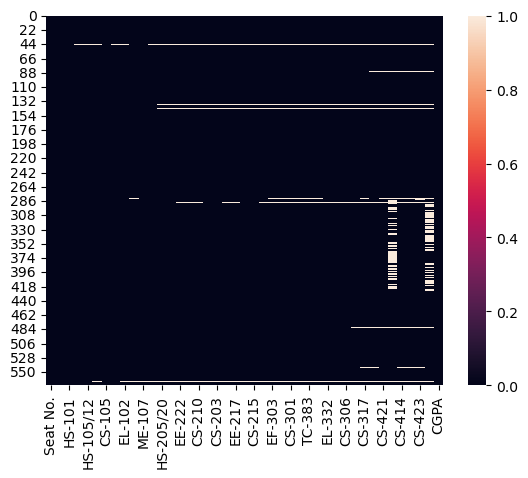

In [22]:
sns.heatmap(df.isnull())

In [23]:
# Removing nan values from the dataset-
for i in df.columns:
    df[i]=df[i].fillna(df[i].mode()[0])

In [24]:
df.isnull().sum().sum()

0

It appears that NaN values have been successfully replaced in the dataset.

<Axes: >

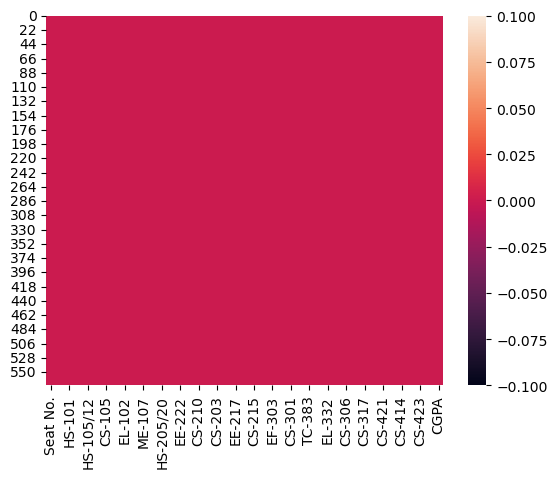

In [25]:
sns.heatmap(df.isnull())

We have no missing values. Looks like we are ready to explore the data visually.

# 3. Data Visualization

# Histogram

We will create a histogram to visually represent the distribution of the data within the dataset's columns containing continuous values.

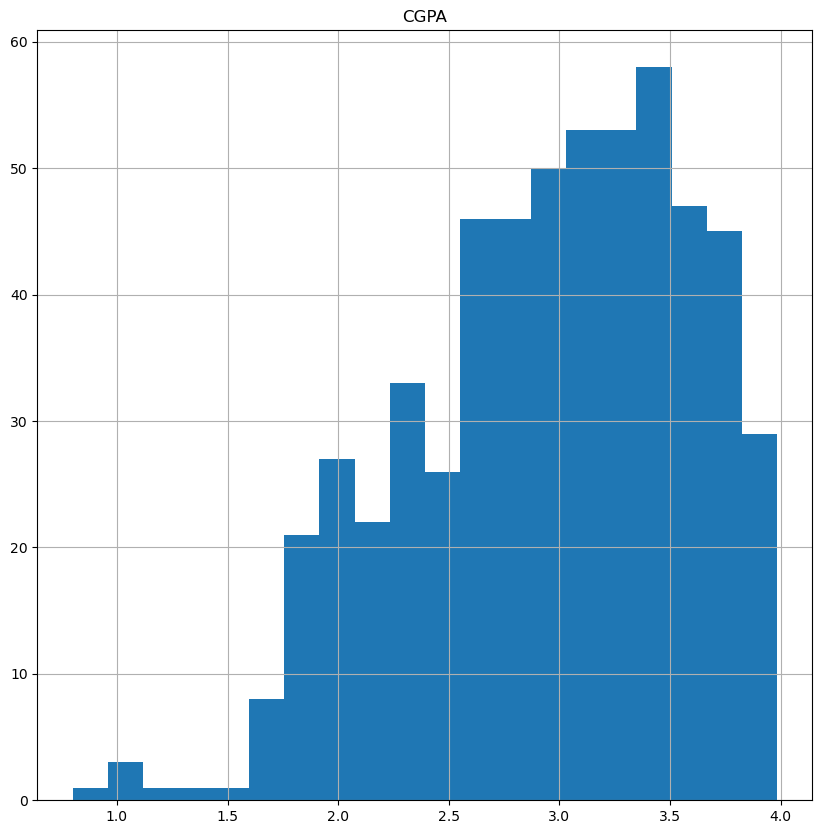

In [26]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

The majority of the data falls within the CGPA range of approximately 2.7 to 3.9.

# Univariate analysis-

 **Analysis of first-year grades:**

<Axes: xlabel='PH-121', ylabel='count'>

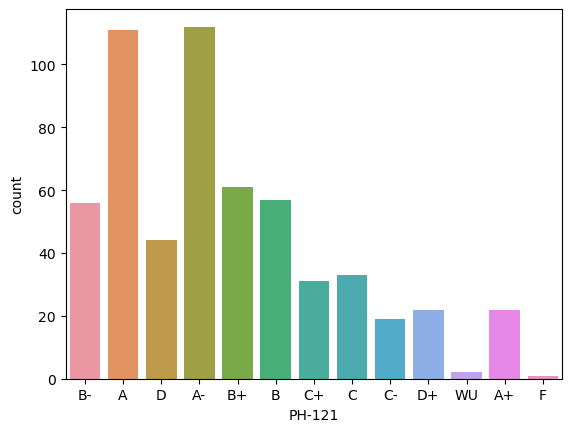

In [27]:
sns.countplot(x='PH-121',data=df)

In the PH department, there are fewer students with A+ grades, while students with A and A- grades are more abundant. The number of students with F grades is also minimal. Additionally, there are instances of students unofficially withdrawing from this department.

<Axes: xlabel='HS-101', ylabel='count'>

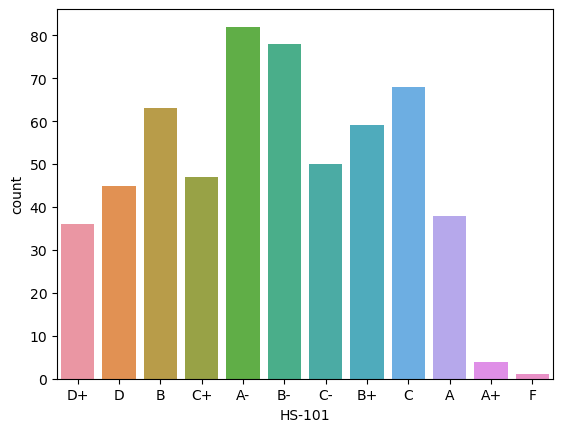

In [28]:
sns.countplot(x='HS-101',data=df)

In the HS department, there are few students with A+ grades, while students with A- and B- grades are more prevalent. The number of students with F grades is also minimal.

<Axes: xlabel='CY-105', ylabel='count'>

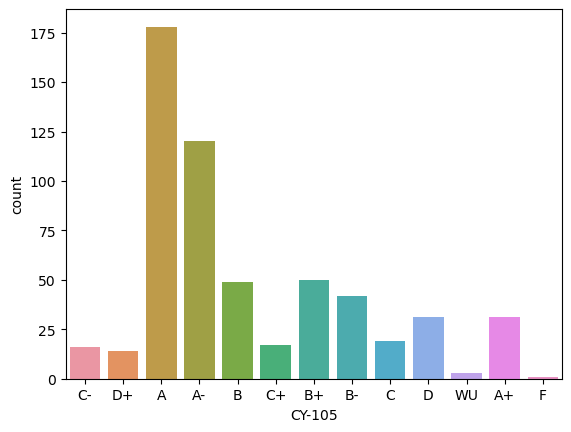

In [29]:
sns.countplot(x='CY-105',data=df)

In the CY department, there is a higher number of students with A and A- grades. The occurrence of F grades is minimal, and there are instances of students unofficially withdrawing from this department.

<Axes: xlabel='HS-105/12', ylabel='count'>

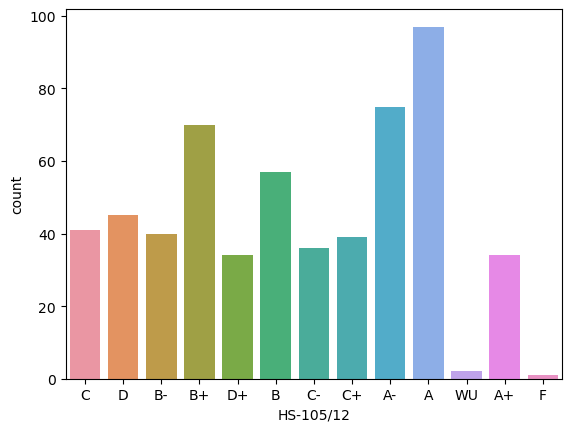

In [30]:
sns.countplot(x='HS-105/12',data=df)

In the HS department, there is a higher number of students with A and A- grades. The occurrence of F grades is minimal, and there are also a significant number of students with A+ grades. Additionally, there are instances of students unofficially withdrawing from this department.

<Axes: xlabel='MT-111', ylabel='count'>

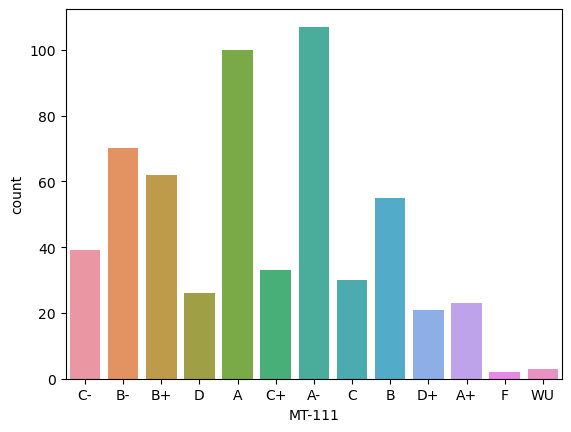

In [31]:
sns.countplot(x='MT-111',data=df)

- In the MT department, a larger number of students have achieved A and A- grades.
- The occurrence of F grades is minimal.
- Additionally, there are instances of students unofficially withdrawing from this department.

<Axes: xlabel='CS-105', ylabel='count'>

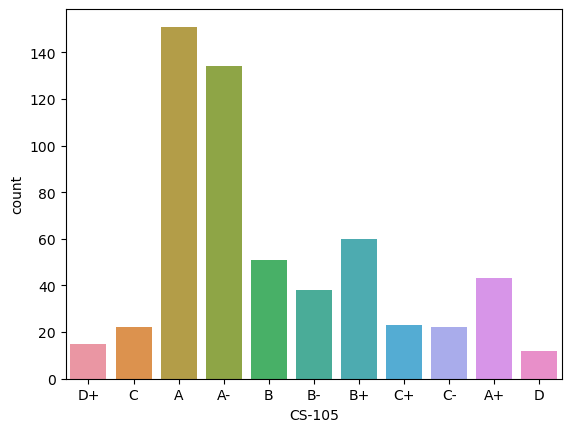

In [32]:
sns.countplot(x='CS-105',data=df)

In the CS-105 department:
- A larger proportion of students have achieved A and A- grades in this department.
- The occurrence of D grades is minimal.
- None of the students failed in this department during the first year.

<Axes: xlabel='CS-106', ylabel='count'>

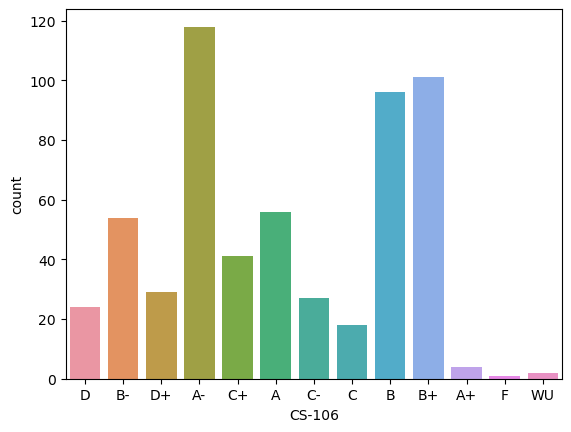

In [33]:
sns.countplot(x='CS-106',data=df)

- The CS-106 department has a higher number of students with A-, B, and B+ grades.
- The occurrence of failing grades is extremely rare.
- Additionally, there are cases of students unofficially withdrawing from this department.

<Axes: xlabel='EL-102', ylabel='count'>

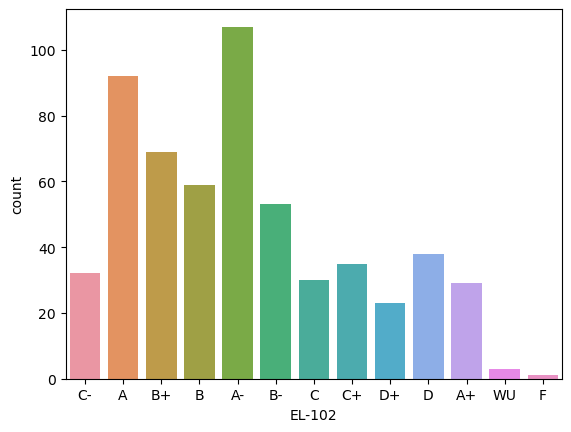

In [34]:
sns.countplot(x='EL-102',data=df)

- In the EL department, a greater proportion of students have A- and A grades.
- The occurrence of failing grades is exceptionally rare.
- Additionally, there are cases of students unofficially withdrawing from this department.

<Axes: xlabel='EE-119', ylabel='count'>

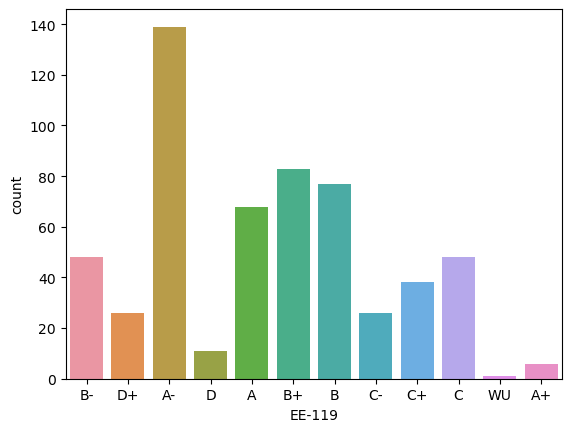

In [35]:
sns.countplot(x='EE-119',data=df)

- The EE department comprises a larger proportion of students with A- grades.
- There were no instances of student failures in this department.
- Additionally, there are cases of students unofficially withdrawing from this department.

<Axes: xlabel='ME-107', ylabel='count'>

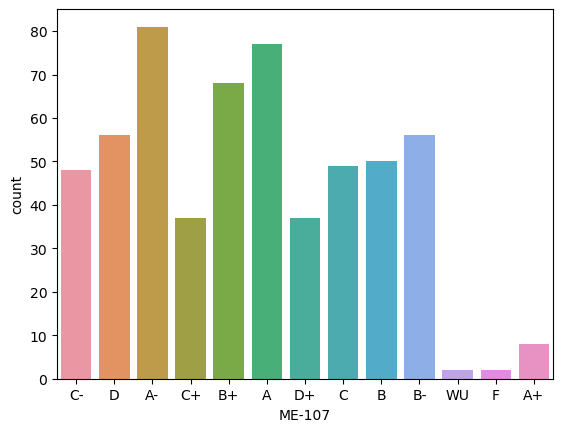

In [36]:
sns.countplot(x='ME-107',data=df)

- In the ME department, a larger proportion of students have A- and A grades.
- Additionally, there are cases of students unofficially withdrawing from this department.
- Overall, this department has performed well in terms of achieving good grades.

<Axes: xlabel='CS-107', ylabel='count'>

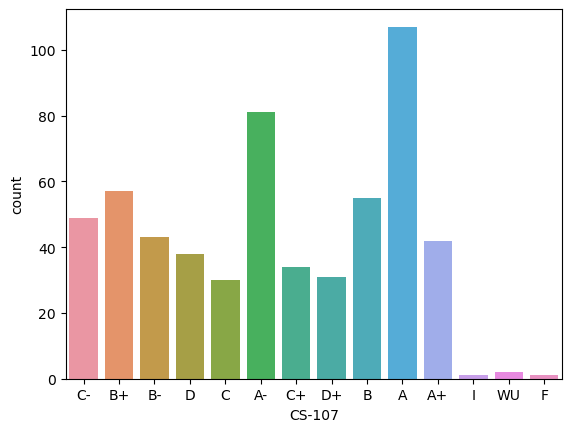

In [37]:
sns.countplot(x='CS-107',data=df)

- The CS-107 department has a higher proportion of students with A and A- grades.
- Additionally, there are cases of students unofficially withdrawing from this department.
- The department has very few instances of student failures.

**Second year analysis-**

<Axes: xlabel='HS-205/20', ylabel='count'>

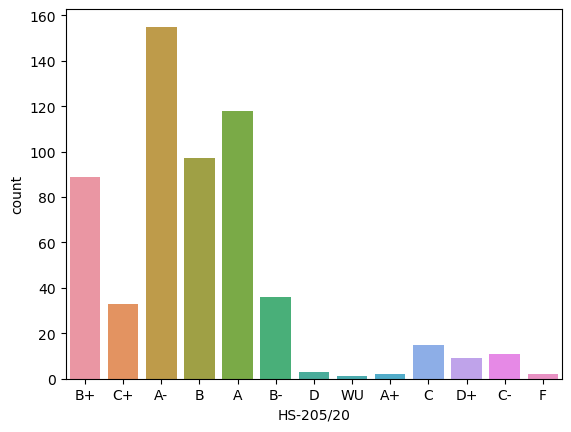

In [38]:
sns.countplot(x='HS-205/20',data=df)

- The HS-205/20 department has a larger population of students with A and A- grades.
- Additionally, there are cases of students unofficially withdrawing from this department.
- The department has very few instances of student failures.
- Students in this department have performed well academically, as there are very few students with D, C, D+, and C- grades.

<Axes: xlabel='MT-222', ylabel='count'>

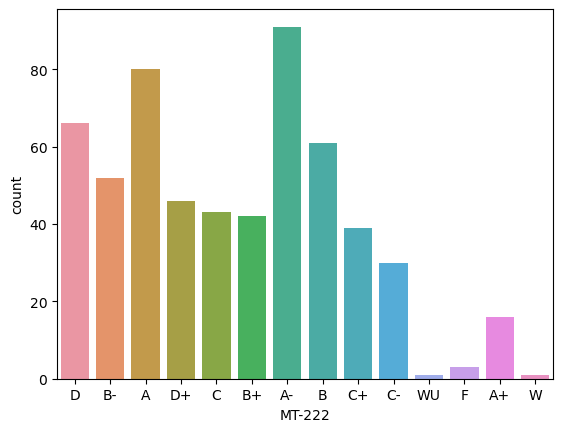

In [39]:
sns.countplot(x='MT-222',data=df)

- The MT-222 department has a greater proportion of students with A and A- grades.
- Additionally, there are cases of students unofficially withdrawing from this department.

<Axes: xlabel='EE-222', ylabel='count'>

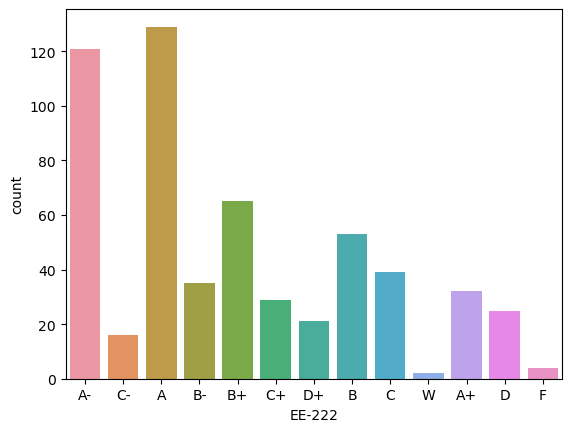

In [40]:
sns.countplot(x='EE-222',data=df)

- The EE-222 department has a larger population of students with A and A- grades.
- Additionally, there are cases of students withdrawing from this department.
- Furthermore, there is also a high number of students with A+ grades in this department.

<Axes: xlabel='MT-224', ylabel='count'>

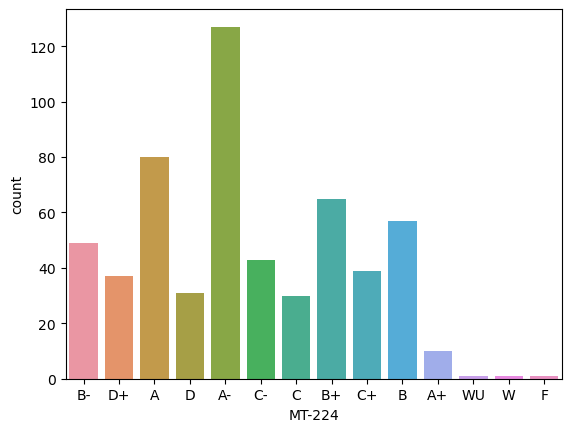

In [41]:
sns.countplot(x='MT-224',data=df)

- The MT-224 department has a larger population of students with A- grades.
- Additionally, there are cases of students unofficially withdrawing from this department.
- Furthermore, there is also a significant number of students with A+ grades in this department.

<Axes: xlabel='CS-210', ylabel='count'>

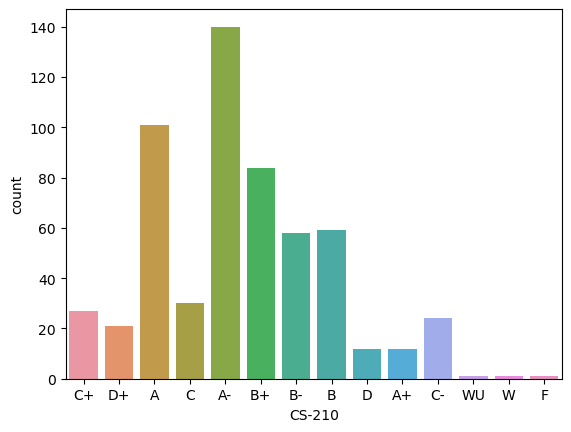

In [42]:
sns.countplot(x='CS-210',data=df)

- The CS-210 department has a larger population of students with A- grades.
- Additionally, there are cases of students unofficially withdrawing from this department.

<Axes: xlabel='CS-211', ylabel='count'>

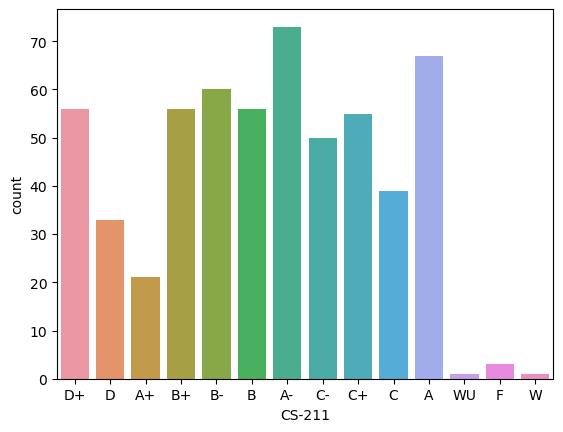

In [43]:
sns.countplot(x='CS-211',data=df)

- The CS-211 department has a greater proportion of students with A- and A grades.
- Additionally, there are cases of students unofficially withdrawing from this department.
- There are also a few instances of students failing in this department.

<Axes: xlabel='CS-203', ylabel='count'>

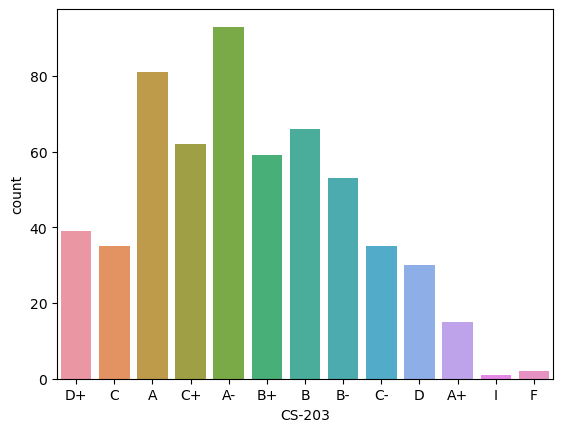

In [44]:
sns.countplot(x='CS-203',data=df)

- The CS-203 department has a greater proportion of students with A- and A grades.
- There are no instances of students withdrawing unofficially in this department.
- There are also a few instances of students failing in this department.

<Axes: xlabel='CS-214', ylabel='count'>

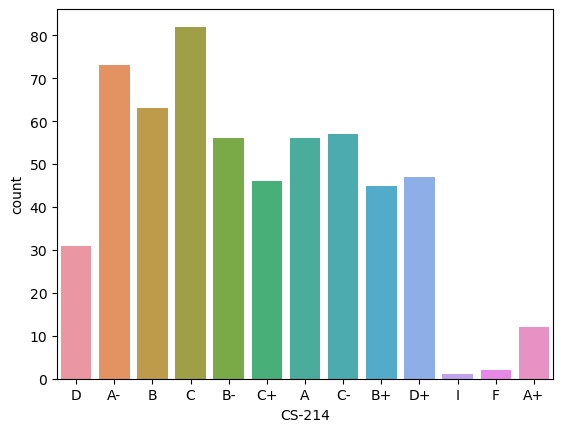

In [45]:
sns.countplot(x='CS-214',data=df)

- The CS-214 department has a greater proportion of students with A- and C grades.
- There are no instances of students withdrawing unofficially in this department.
- There are also a few instances of students failing in this department.
- Additionally, a few students have scored A+ grades in this department.

<Axes: xlabel='EE-217', ylabel='count'>

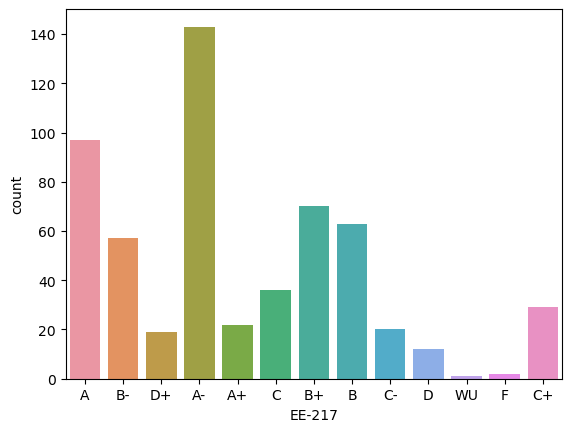

In [46]:
sns.countplot(x='EE-217',data=df)

- The EE-217 department has a greater proportion of students with A- and A grades.
- There are also a few instances of students failing in this department.
- Additionally, a few students have scored A+ grades in this department.

<Axes: xlabel='CS-212', ylabel='count'>

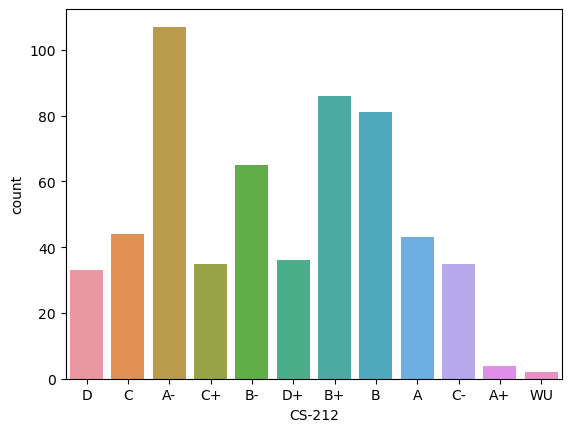

In [47]:
sns.countplot(x='CS-212',data=df)

- The CS-212 department has a larger population of students with A-, B+, and B grades.
- No students have failed in this department.
- Additionally, a few students have scored A+ grades.
- There are also instances of students unofficially withdrawing from this department.

<Axes: xlabel='CS-215', ylabel='count'>

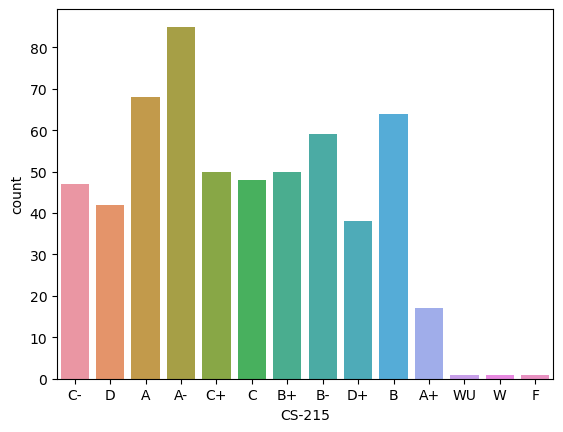

In [48]:
sns.countplot(x='CS-215',data=df)

- The CS-215 department has a larger population of students with A-, A, and B grades.
- There are also a few instances of students failing in this department.
- A significant number of students have scored A+ grades in this department.
- Additionally, there are instances of students unofficially withdrawing from this department.

**Third year data analysis-**

<Axes: xlabel='MT-331', ylabel='count'>

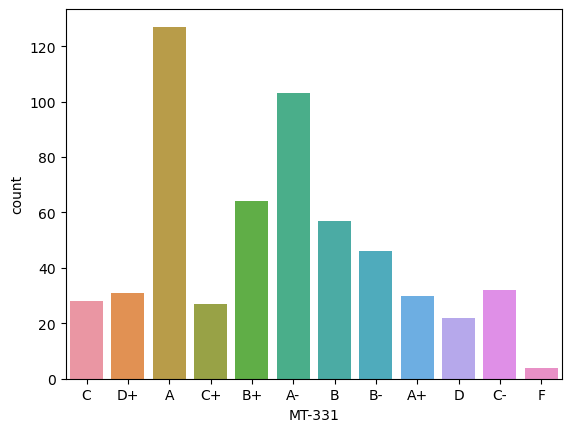

In [49]:
sns.countplot(x='MT-331',data=df)

- The CS-215 department has a greater proportion of students with A- and A grades.
- There are also a few instances of students failing in this department.
- A significant number of students have scored A+ grades in this department.
- There are no instances of students unofficially withdrawing from this department.

<Axes: xlabel='EF-303', ylabel='count'>

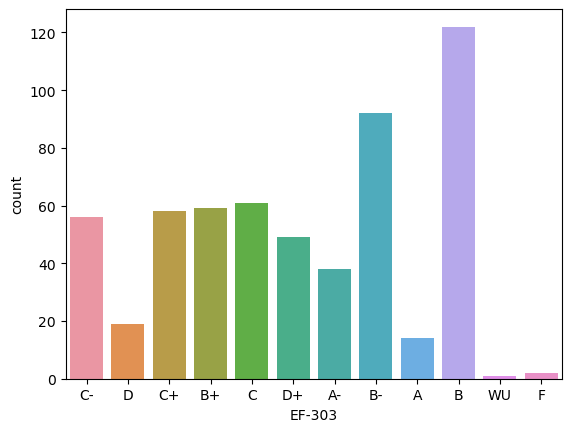

In [50]:
sns.countplot(x='EF-303',data=df)

In the EF-303 department:
- There is a higher number of students with B and B- grades.
- There are also a few instances of students failing in this department.
- No students have scored A+ grades in this department.
- Additionally, there are instances of students unofficially withdrawing from this department.

<Axes: xlabel='HS-304', ylabel='count'>

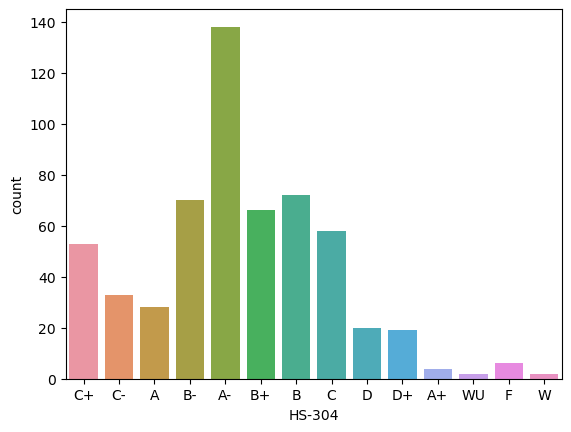

In [51]:
sns.countplot(x='HS-304',data=df)

Apologies for that! Let me rephrase the sentences into bullet points:

- The HS-304 department has a higher proportion of students with A- grades.
- Some students in this department have also experienced failures.
- Additionally, a small number of students have earned A+ grades.
- There are instances of students unofficially withdrawing from this department as well.


<Axes: xlabel='CS-301', ylabel='count'>

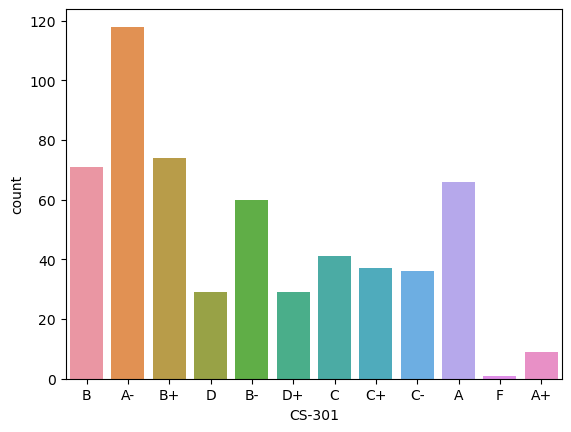

In [52]:
sns.countplot(x='CS-301',data=df)

- The CS-301 department exhibits a larger population of students achieving A- grades.
- Additionally, there are occurrences of students facing failures within this department.
- Moreover, a select few students have attained A+ grades.
- Notably, there are no recorded instances of students unofficially withdrawing from this department.

<Axes: xlabel='CS-302', ylabel='count'>

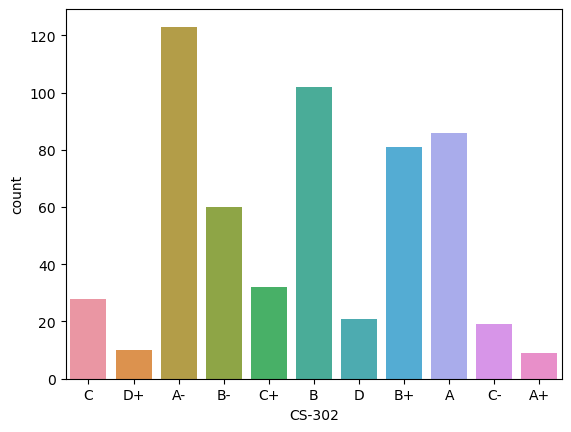

In [53]:
sns.countplot(x='CS-302',data=df)

- The CS-302 department shows a greater presence of students securing A- and B grades.
- Remarkably, no students have recorded failures within this department.
- Furthermore, a small number of students have achieved A+ grades.
- Notably, there are no documented instances of students unofficially withdrawing from this department.

<Axes: xlabel='TC-383', ylabel='count'>

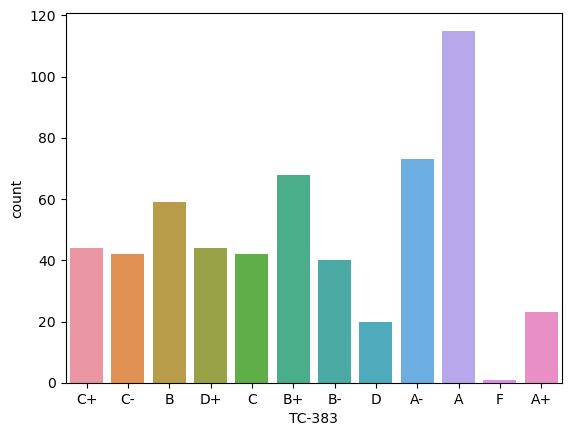

In [54]:
sns.countplot(x='TC-383',data=df)

- Within the TC-383 department, a notable proportion of students have attained A grades.
- Additionally, there are occurrences of students experiencing failures in this department.
- A considerable number of students have achieved A+ grades as well.
- Importantly, there are no recorded instances of students unofficially withdrawing from this department.

<Axes: xlabel='MT-442', ylabel='count'>

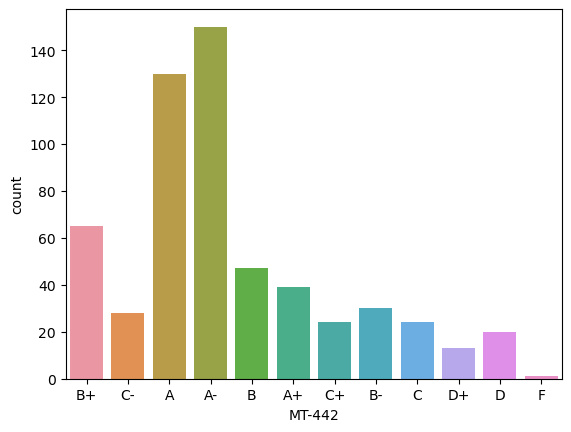

In [55]:
sns.countplot(x='MT-442',data=df)

- The MT-442 department has a greater proportion of students achieving A- and A grades.
- Additionally, there are occurrences of students experiencing failures within this department.
- A considerable number of students have also achieved A+ grades.
- Importantly, there are no recorded instances of students unofficially withdrawing from this department.

<Axes: xlabel='EL-332', ylabel='count'>

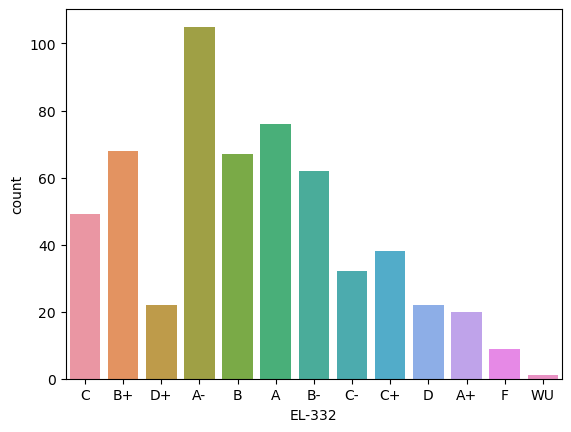

In [56]:
sns.countplot(x='EL-332',data=df)

- The EL-332 department exhibits a higher prevalence of students achieving A- and A grades.
- Additionally, there are instances of students experiencing failures within this department.
- A notable number of students have also achieved A+ grades.
- Furthermore, there are occurrences of students unofficially withdrawing from this department.

<Axes: xlabel='CS-318', ylabel='count'>

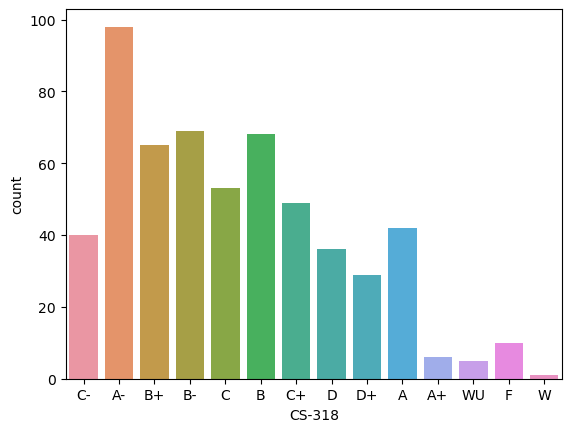

In [57]:
sns.countplot(x='CS-318',data=df)

- Within the CS-318 department, a larger proportion of students have achieved A- grades.
- Additionally, there are instances of students experiencing failures within this department.
- Moreover, a few students have also attained A+ grades.
- Notably, there are occurrences of students unofficially withdrawing from this department.

<Axes: xlabel='CS-306', ylabel='count'>

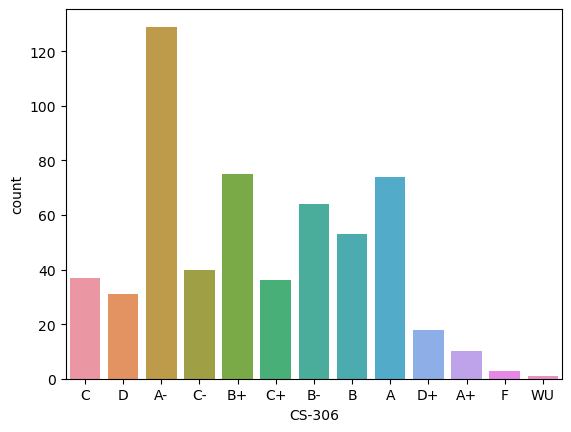

In [58]:
sns.countplot(x='CS-306',data=df)

- The CS-306 department shows a greater presence of students securing A- grades.
- Additionally, there are instances of students facing failures within this department.
- Moreover, a few students have achieved A+ grades.
- Notably, there are occurrences of students unofficially withdrawing from this department.

<Axes: xlabel='CS-312', ylabel='count'>

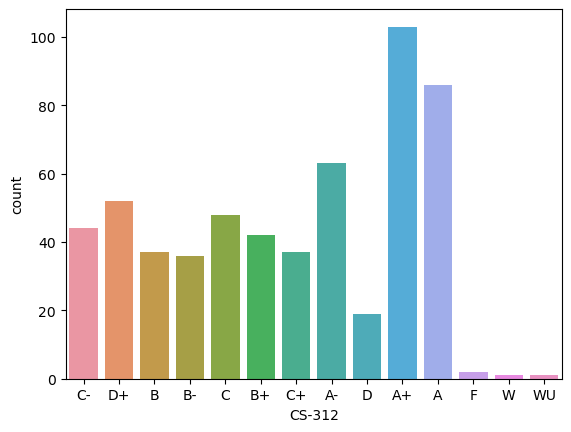

In [59]:
sns.countplot(x='CS-312',data=df)

- The CS-312 department displays a higher prevalence of students achieving A+ and A grades.
- Remarkably, only a minimal number of students have faced failures within this department.
- Furthermore, a significant number of students have attained A+ grades.
- Additionally, there are a few instances of students unofficially withdrawing from this department.

- In the CS-312 department, a greater proportion of students have secured A+ and A grades.
- Notably, the occurrence of student failures in this department is minimal.
- Moreover, a significant number of students have achieved A+ grades.
- Additionally, there are instances of students unofficially withdrawing from this department.

<Axes: xlabel='CS-317', ylabel='count'>

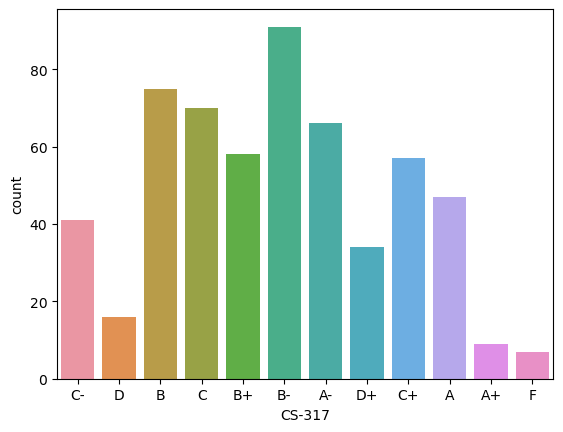

In [60]:
sns.countplot(x='CS-317',data=df)

- Within the CS-317 department, a predominant number of students exhibit B- grades.
- The incidence of student failures in this department is minimal.
- Additionally, there are a few instances of students attaining A+ grades.
- Notably, there are no occurrences of students withdrawing unofficially from this department.

**Fourth year data analysis-**

<Axes: xlabel='CS-403', ylabel='count'>

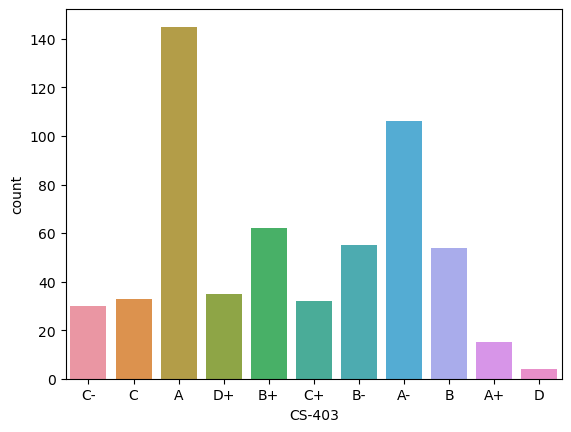

In [61]:
sns.countplot(x='CS-403',data=df)

- The CS-403 department boasts a higher count of students with A grades.
- Remarkably, there are no recorded instances of student failures within this department.
- Although few in number, some students have excelled and achieved A+ grades.
- Notably, there are no instances of students withdrawing unofficially from this department.

<Axes: xlabel='CS-421', ylabel='count'>

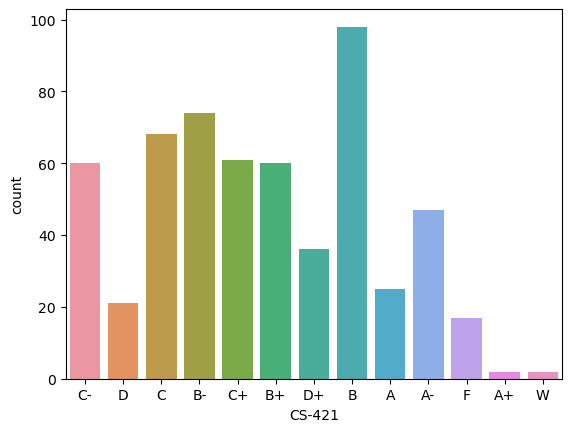

In [62]:
sns.countplot(x='CS-421',data=df)

- Within the CS-421 department, a majority of students received B grades.
- Unfortunately, some students experienced failure within this department.
- Notably, very few students achieved A+ grades.
- Furthermore, instances of students withdrawing from this department were observed.

<Axes: xlabel='CS-406', ylabel='count'>

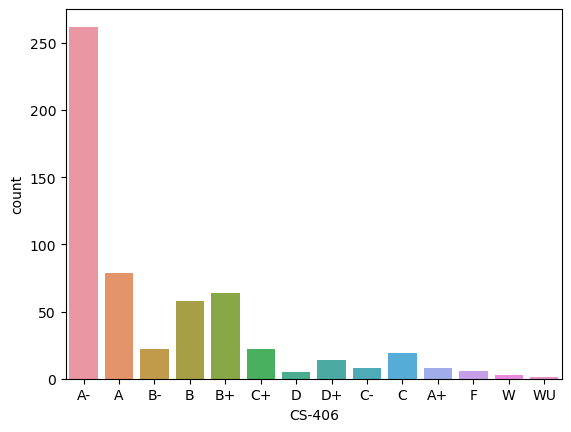

In [63]:
sns.countplot(x='CS-406',data=df)

- The CS-406 department primarily comprises students with A- grades.
- Failure rates are low within this department.
- A small number of students have achieved A+ grades.
- Additionally, there are few instances of students unofficially withdrawing from this department.

<Axes: xlabel='CS-414', ylabel='count'>

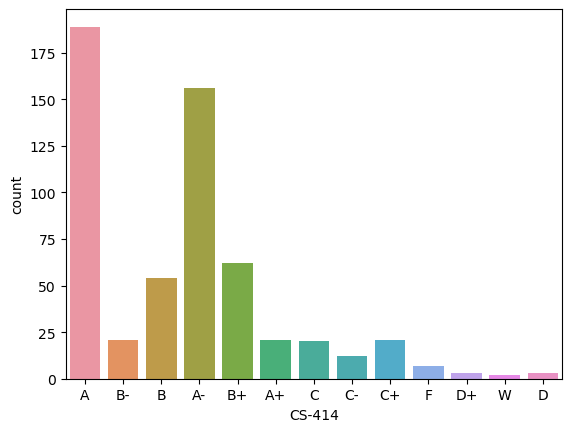

In [64]:
sns.countplot(x='CS-414',data=df)

- In the CS-414 department, a significant portion of students earned A and A- grades.
- The number of students who failed in this department is low.
- Some students have achieved A+ grades.
- Additionally, there are instances of students withdrawing from this department.

<Axes: xlabel='CS-419', ylabel='count'>

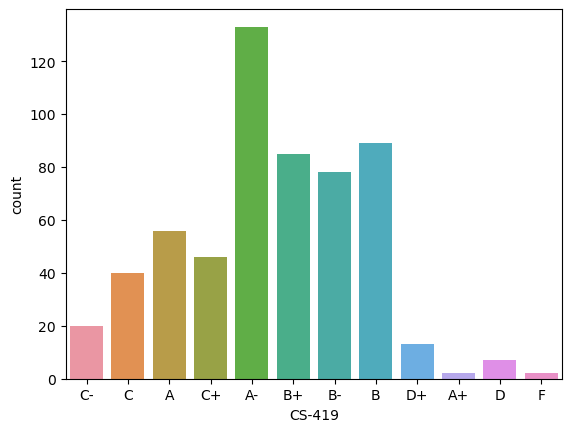

In [65]:
sns.countplot(x='CS-419',data=df)

- CS-419 department comprises mostly of students with A- grades.
- The number of students who failed in this department is minimal.
- A very small proportion of students achieved A+ grades.
- No instances of students withdrawing unofficially from this department were observed.

<Axes: xlabel='CS-423', ylabel='count'>

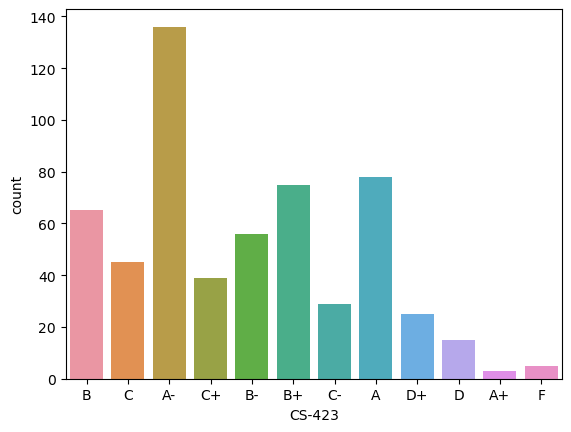

In [66]:
sns.countplot(x='CS-423',data=df)

- CS-423 department predominantly consists of students with A- grades.
- The number of students who failed in this department is minimal.
- Few students have achieved A+ grades.
- There are no instances of students withdrawing unofficially from this department.

<Axes: xlabel='CS-412', ylabel='count'>

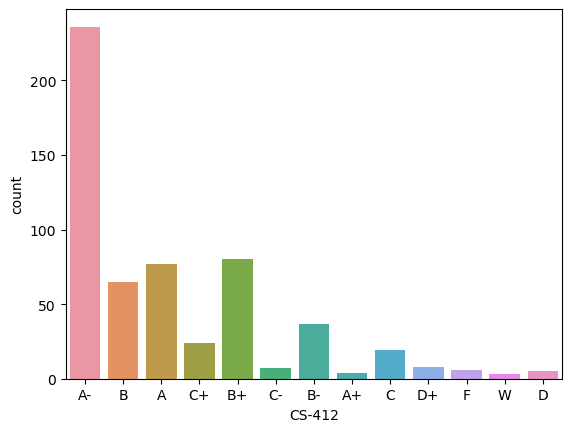

In [67]:
sns.countplot(x='CS-412',data=df)

- The CS-412 department has a predominant number of students achieving A- grades.
- Only a small number of students have failed in this department.
- Similarly, there are few students who have achieved A+ grades.
- Additionally, a minor proportion of students have withdrawn from this department.

# Observations:

- The CS-312 department shows outstanding academic performance, with a majority of students scoring exceptionally high marks, including A+ and A grades.
- In contrast, the CS-421 department exhibits poor academic performance, with a majority of students failing, and only a few managing to attain A and A+ grades.

# Bivariate analysis-

<Axes: xlabel='PH-121', ylabel='CGPA'>

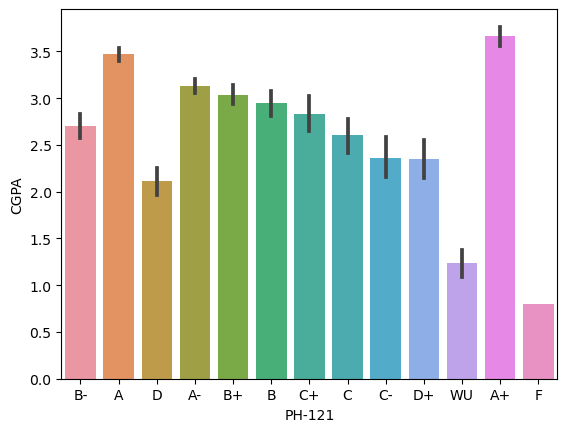

In [68]:
sns.barplot(x='PH-121',y='CGPA',data=df)

Students who achieve more A+ and A grades tend to have higher CGPA.

In [69]:
#We'll exclude seat number from the analysis since it doesn't appear to strongly predict CGPA.
df.drop(['Seat No.'],axis='columns',inplace=True)

Eliminating entries with inconsistent grade records.

Please note:Though these grades have meaningful significance, I decided to remove them for simplicity. Typically, retaining such values is advisable since they contribute to the prediction of the target variable. However, since they are few and lack corresponding grade points, I opted for their removal.

In [70]:
# Finds entries containing "Wu" and "W", then removes them based on their indices. 
for i in df.columns:
    df.drop(df[(df.loc[:,i]=='WU')| (df.loc[:,i]=='W')].index,inplace=True)

In [71]:
df[444:458]

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
461,A,A-,A,A,A,A+,A-,B+,A-,A,...,A,B,A,A-,A,B+,A,A-,A-,3.843
462,A,C,A,A,B,A,B+,B+,A-,B+,...,A,B,A,B-,B+,B,A-,B+,B,3.339
463,A,B+,A,A,A-,A+,A,A-,A+,A+,...,A,B+,A,A-,A,A-,A,A-,A-,3.818
464,A,B+,A,A,A,A,C+,B+,A-,B-,...,A,A-,A,B,A,B,A-,A-,A-,3.607
465,A-,B,A+,A-,A,A+,B-,A,B+,C+,...,A,B,A,A,B+,B,B+,B,B+,3.528
466,A-,C-,A,A,B-,A,B-,B-,B+,B,...,A-,B,A,B-,B,B,B+,C,B-,3.149
467,C+,B-,A,B,A,B+,B-,D,C,C,...,B+,C-,B+,D+,C,B+,C,D+,C,2.264
469,A,A-,A+,A,A,A+,B,A-,B+,B+,...,A+,A-,A,B+,A,B+,A,A,A-,3.714
470,B-,B,A-,B-,B-,A,B,B,B,C+,...,B+,C+,A-,C,B-,C-,B+,C+,C,2.706
471,B+,C,A,A,A-,A-,B-,B+,A-,C-,...,A,B+,A,B,B,B,A-,B+,B+,3.339


In [72]:
# Verifies that records with "WU" and "W" grades have been successfully removed.
for column in df.columns.values.tolist():
    print(column)
    print (df[column].isin(['WU','W']).value_counts())
    print("")

PH-121
PH-121
False    547
Name: count, dtype: int64

HS-101
HS-101
False    547
Name: count, dtype: int64

CY-105
CY-105
False    547
Name: count, dtype: int64

HS-105/12
HS-105/12
False    547
Name: count, dtype: int64

MT-111
MT-111
False    547
Name: count, dtype: int64

CS-105
CS-105
False    547
Name: count, dtype: int64

CS-106
CS-106
False    547
Name: count, dtype: int64

EL-102
EL-102
False    547
Name: count, dtype: int64

EE-119
EE-119
False    547
Name: count, dtype: int64

ME-107
ME-107
False    547
Name: count, dtype: int64

CS-107
CS-107
False    547
Name: count, dtype: int64

HS-205/20
HS-205/20
False    547
Name: count, dtype: int64

MT-222
MT-222
False    547
Name: count, dtype: int64

EE-222
EE-222
False    547
Name: count, dtype: int64

MT-224
MT-224
False    547
Name: count, dtype: int64

CS-210
CS-210
False    547
Name: count, dtype: int64

CS-211
CS-211
False    547
Name: count, dtype: int64

CS-203
CS-203
False    547
Name: count, dtype: int64

CS-214
CS-214
Fa

In [73]:
df['HS-101'].unique()

array(['D+', 'D', 'B', 'C+', 'A-', 'B-', 'C-', 'B+', 'C', 'A', 'A+', 'F'],
      dtype=object)

# Encoding Categorical Values

In some educational systems, Cumulative Grade Point Average (CGPA) is calculated based on the grades assigned to students, with each grade corresponding to a specific grade point or pointer. Here's an example of a CGPA grading system with corresponding grade points and marks:

| CGPA Grade | Grade Point | Marks Range |
|------------|-------------|-------------|
| A+         | 4.00        | 90-100      |
| A          | 3.67        | 85-89       |
| A-         | 3.33        | 80-84       |
| B+         | 3.00        | 75-79       |
| B          | 2.67        | 70-74       |
| B-         | 2.33        | 65-69       |
| C+         | 2.00        | 60-64       |
| C          | 1.67        | 55-59       |
| C-         | 1.33        | 50-54       |
| D+         | 1.00        | 45-49       |
| D          | 0.67        | 40-44       |
| F          | 0.00        | Below 40    |

In this example:
- Each CGPA grade is associated with a specific grade point, which is used to calculate the overall CGPA.
- Grade points are typically assigned based on the percentage of marks obtained by students in various assessments.
- Grades are generally assigned based on predefined ranges of marks, with higher grades corresponding to higher marks.

Students' CGPA is calculated by averaging the grade points obtained in all courses over a specified period, such as a semester or academic year. The CGPA scale provides a standardized measure of academic performance, allowing for easy comparison and evaluation of students' progress.

**The grades have been encoded to represent their equivalent GPAs.**

In [74]:
for column in df.columns:
    
    df[column]=df[column].replace('A+',4.00)
    df[column]=df[column].replace('A', 3.67 )
    df[column]=df[column].replace('A-',3.33)
    df[column]=df[column].replace('B+',3.00)
    df[column]=df[column].replace('B',2.67)
    df[column]=df[column].replace('B-',2.33)
    df[column]=df[column].replace('C+',2.00)
    df[column]=df[column].replace('C',1.67)
    df[column]=df[column].replace('C-',1.33)
    df[column]=df[column].replace('D+',1.00)
    df[column]=df[column].replace('D', 0.67 )
    df[column]=df[column].replace('F', 0.00 )


In [75]:
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,2.33,1.00,1.33,1.67,1.33,1.00,0.67,1.33,2.33,1.33,...,1.33,1.33,1.33,1.33,3.33,3.67,1.33,2.67,3.33,2.205
1,3.67,0.67,1.00,0.67,2.33,1.67,0.67,3.67,1.00,0.67,...,1.00,0.67,1.67,0.67,3.33,2.33,1.67,1.67,2.67,2.008
2,3.67,2.67,3.67,2.33,3.00,3.67,2.33,3.00,3.33,3.33,...,2.67,2.67,3.67,1.67,3.67,3.67,3.67,3.33,3.67,3.608
3,0.67,2.00,1.00,0.67,0.67,3.33,1.00,1.33,0.67,2.00,...,1.00,1.67,1.00,1.33,2.33,2.67,2.00,2.00,2.00,1.906
4,3.33,3.33,3.33,3.00,3.67,3.67,3.33,3.00,3.67,3.33,...,2.33,3.00,3.00,2.33,3.33,3.67,3.33,3.33,3.67,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,2.67,3.67,3.67,3.33,4.00,3.67,3.33,3.33,4.00,3.00,...,3.33,3.33,3.67,3.67,3.67,3.00,3.00,2.67,3.67,3.798
567,4.00,3.67,3.67,3.67,3.67,3.67,3.67,3.33,3.67,3.67,...,3.00,3.00,3.67,3.67,3.33,2.67,3.33,1.67,3.33,3.772
568,2.67,3.67,3.33,3.00,3.67,3.67,3.67,3.67,3.67,2.67,...,3.33,2.67,3.67,3.00,3.67,1.67,3.00,3.33,3.33,3.470
569,3.67,3.00,0.67,3.67,0.67,1.00,2.33,1.33,2.33,1.33,...,0.67,2.67,2.67,1.33,0.67,1.67,2.67,2.33,1.67,2.193


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 547 entries, 0 to 570
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     547 non-null    float64
 1   HS-101     547 non-null    float64
 2   CY-105     547 non-null    float64
 3   HS-105/12  547 non-null    float64
 4   MT-111     547 non-null    float64
 5   CS-105     547 non-null    float64
 6   CS-106     547 non-null    float64
 7   EL-102     547 non-null    float64
 8   EE-119     547 non-null    float64
 9   ME-107     547 non-null    float64
 10  CS-107     547 non-null    float64
 11  HS-205/20  547 non-null    float64
 12  MT-222     547 non-null    float64
 13  EE-222     547 non-null    float64
 14  MT-224     547 non-null    float64
 15  CS-210     547 non-null    float64
 16  CS-211     547 non-null    float64
 17  CS-203     547 non-null    float64
 18  CS-214     547 non-null    float64
 19  EE-217     547 non-null    float64
 20  CS-212     547 

In [77]:
for i in df.columns:
    print(i,'-',df[i].mean())

PH-121 - 2.7242778793418645
HS-101 - 2.299232175502742
CY-105 - 2.9761974405850093
HS-105/12 - 2.5788117001828157
MT-111 - 2.7019744058500916
CS-105 - 3.0361608775137117
CS-106 - 2.63800731261426
EL-102 - 2.6784460694698358
EE-119 - 2.7013345521023764
ME-107 - 2.3951736745886656
CS-107 - 2.6627422303473494
HS-205/20 - 2.976435100548446
MT-222 - 2.395941499085923
EE-222 - 2.8425411334552106
MT-224 - 2.584296160877514
CS-210 - 2.8286471663619746
CS-211 - 2.3840036563071303
CS-203 - 2.5406946983546623
CS-214 - 2.316489945155393
EE-217 - 2.837221206581353
CS-212 - 2.4752833638025593
CS-215 - 2.4097074954296165
MT-331 - 2.7601462522851925
EF-303 - 2.196325411334552
HS-304 - 2.504204753199269
CS-301 - 2.56672760511883
CS-302 - 2.777184643510055
TC-383 - 2.6031078610603293
MT-442 - 2.9440402193784276
EL-332 - 2.6155941499085924
CS-318 - 2.358299817184643
CS-306 - 2.6292870201096887
CS-312 - 2.6772760511883
CS-317 - 2.389506398537477
CS-403 - 2.7899817184643507
CS-421 - 2.1993784277879342
CS-4

Observations:

- Upon calculating the average score of all the columns, it's evident that the department CS-414 in the 4th year has the highest overall score.
- Students enrolled in CS-414 have performed exceptionally well.
- Conversely, CS-421 has the lowest score, primarily due to a high number of student failures and low grades achieved.

In [78]:
df.corr()['CGPA']

PH-121       0.651943
HS-101       0.555424
CY-105       0.684053
HS-105/12    0.660568
MT-111       0.747273
CS-105       0.610230
CS-106       0.597483
EL-102       0.656972
EE-119       0.651672
ME-107       0.662668
CS-107       0.610831
HS-205/20    0.472398
MT-222       0.680019
EE-222       0.592837
MT-224       0.727769
CS-210       0.806323
CS-211       0.675615
CS-203       0.668519
CS-214       0.783605
EE-217       0.705508
CS-212       0.707140
CS-215       0.784556
MT-331       0.566249
EF-303       0.569134
HS-304       0.610431
CS-301       0.757699
CS-302       0.763208
TC-383       0.657930
MT-442       0.645047
EL-332       0.794193
CS-318       0.610084
CS-306       0.766016
CS-312       0.535375
CS-317       0.817113
CS-403       0.643714
CS-421       0.731129
CS-406       0.506261
CS-414       0.390803
CS-419       0.716762
CS-423       0.570419
CS-412       0.507618
CGPA         1.000000
Name: CGPA, dtype: float64

# Correlation using a Heatmap

1. Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.

2. Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

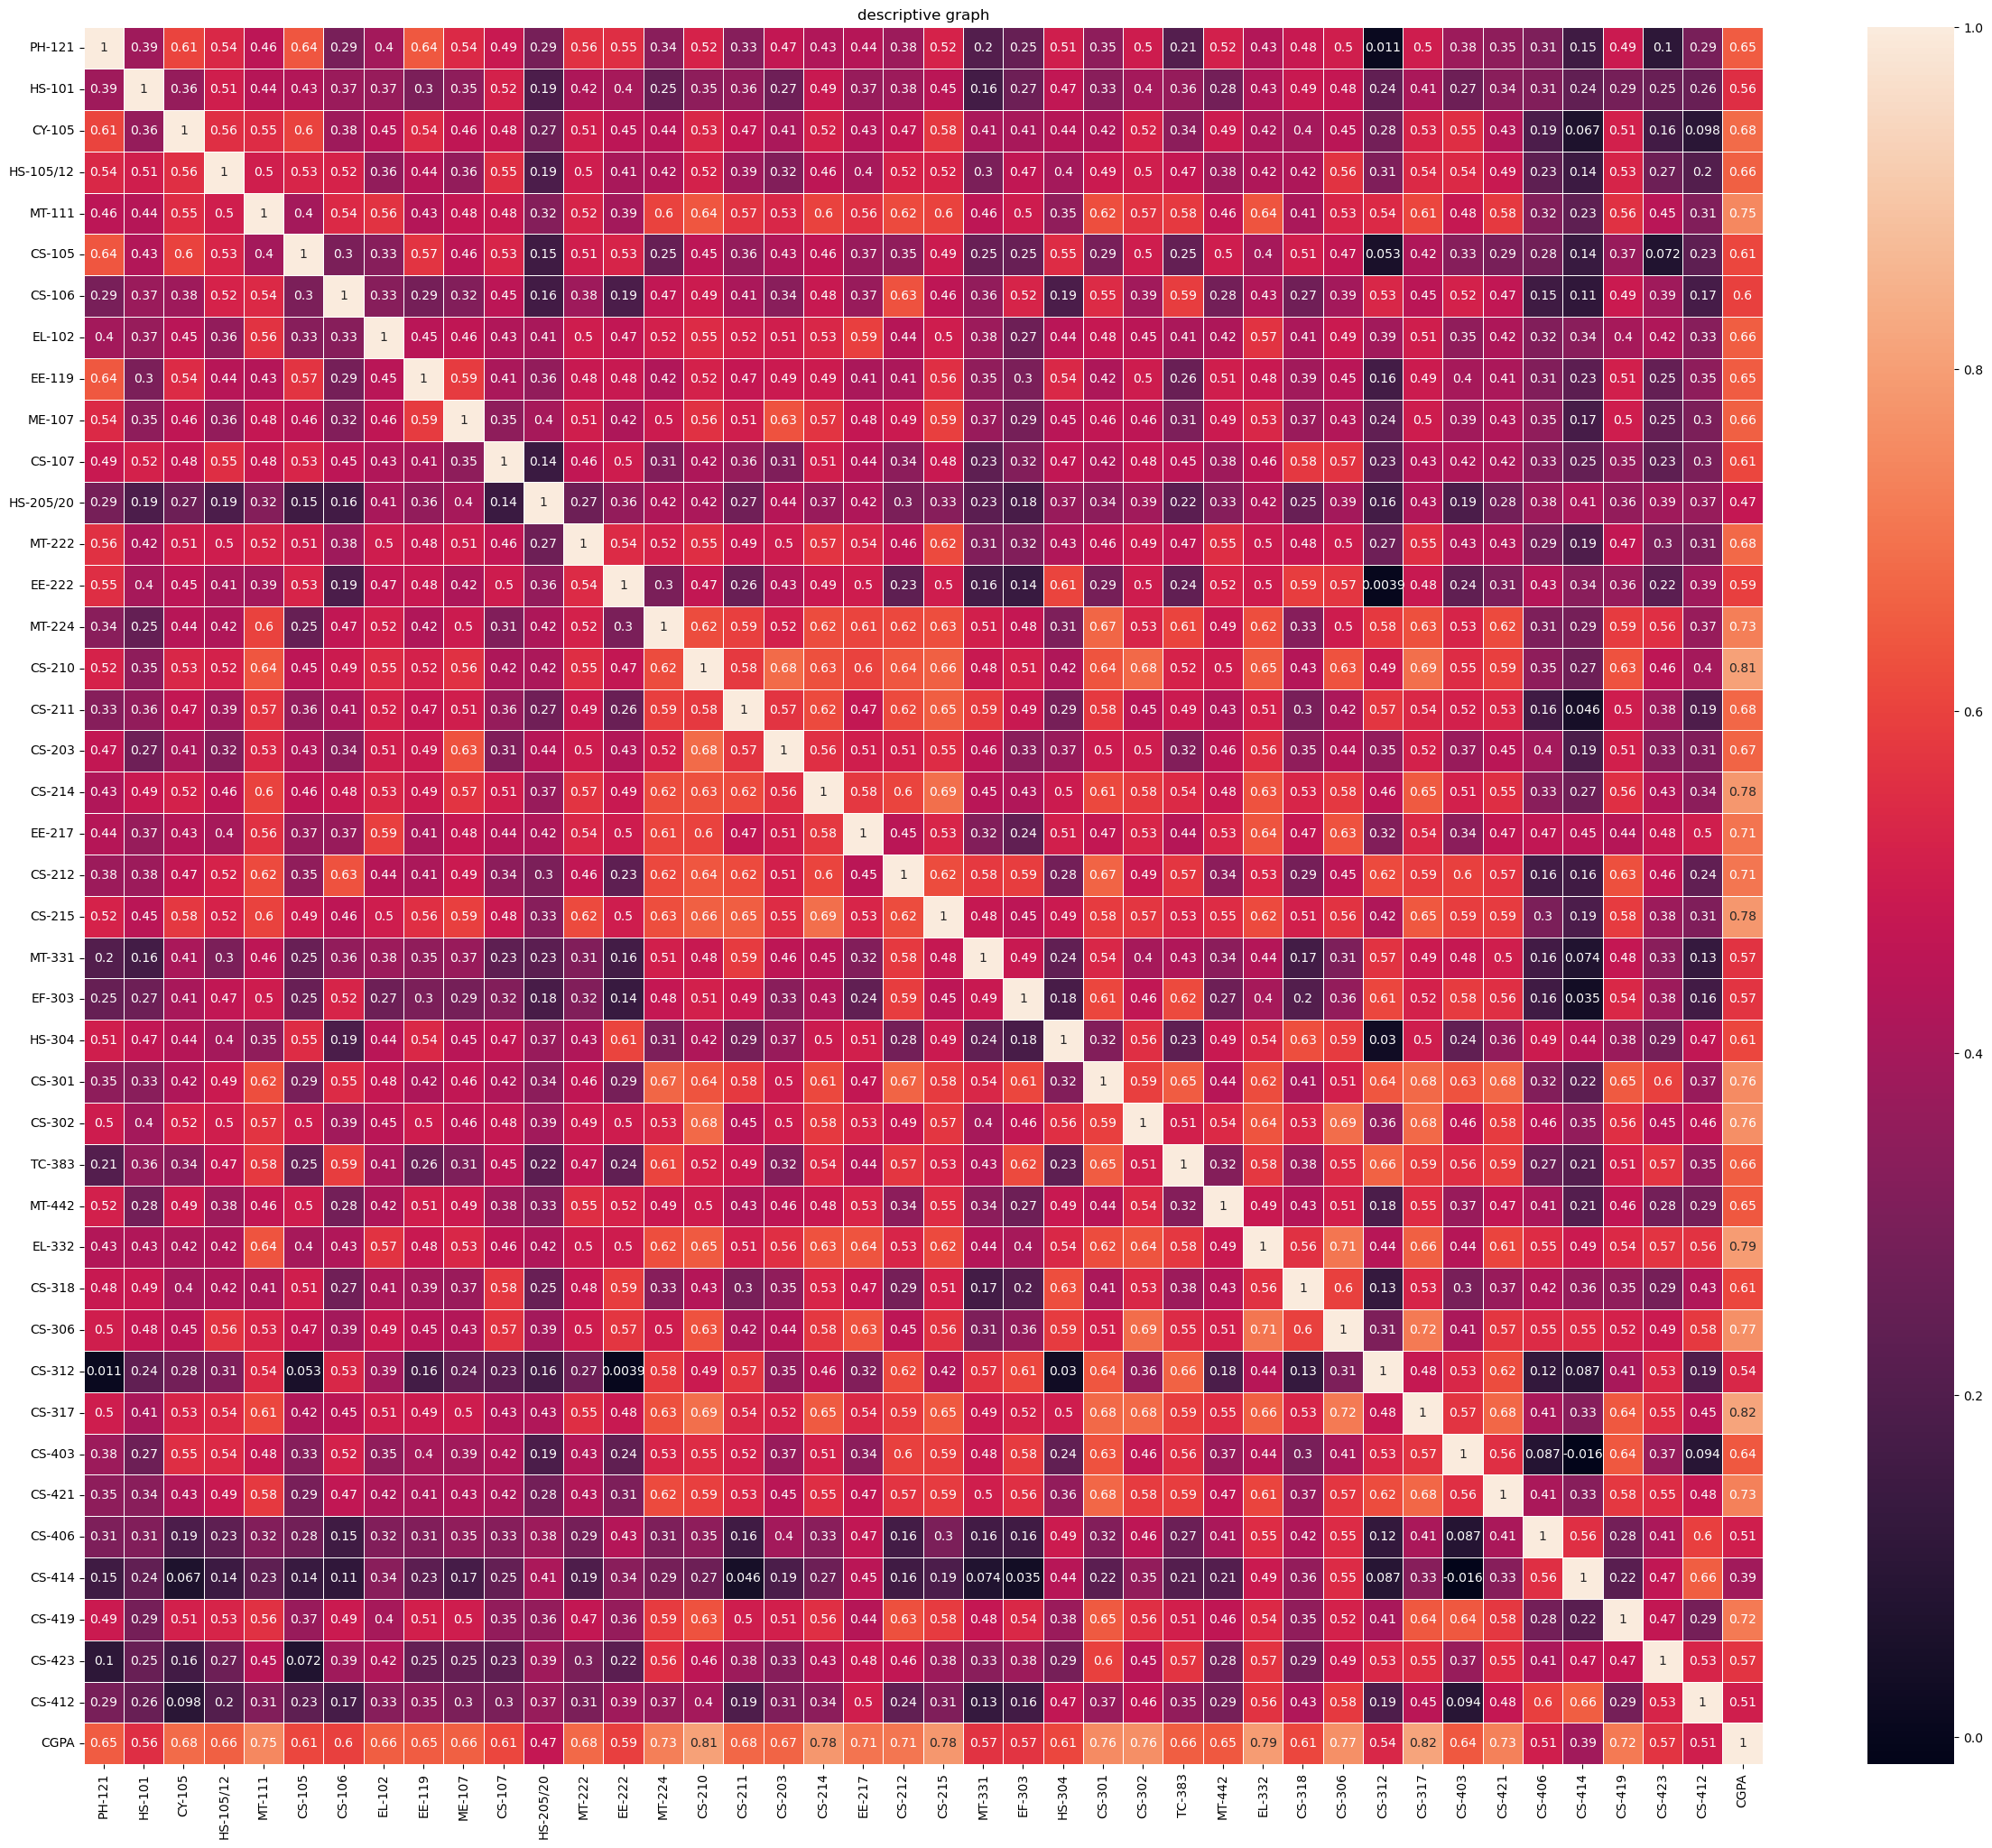

In [79]:
plt.figure(figsize=(30,25))
sns.heatmap(df.corr(),annot=True,linewidth=0.5)
plt.title('descriptive graph')
plt.show()

# Multivariate analysis-

In [ ]:
sns.pairplot(df,hue='CGPA')
plt.show()

**Splitting the dataset into features and labels.**

In [81]:
x=df.drop(columns='CGPA',axis=1)
y=df.CGPA

# Distribution plot-

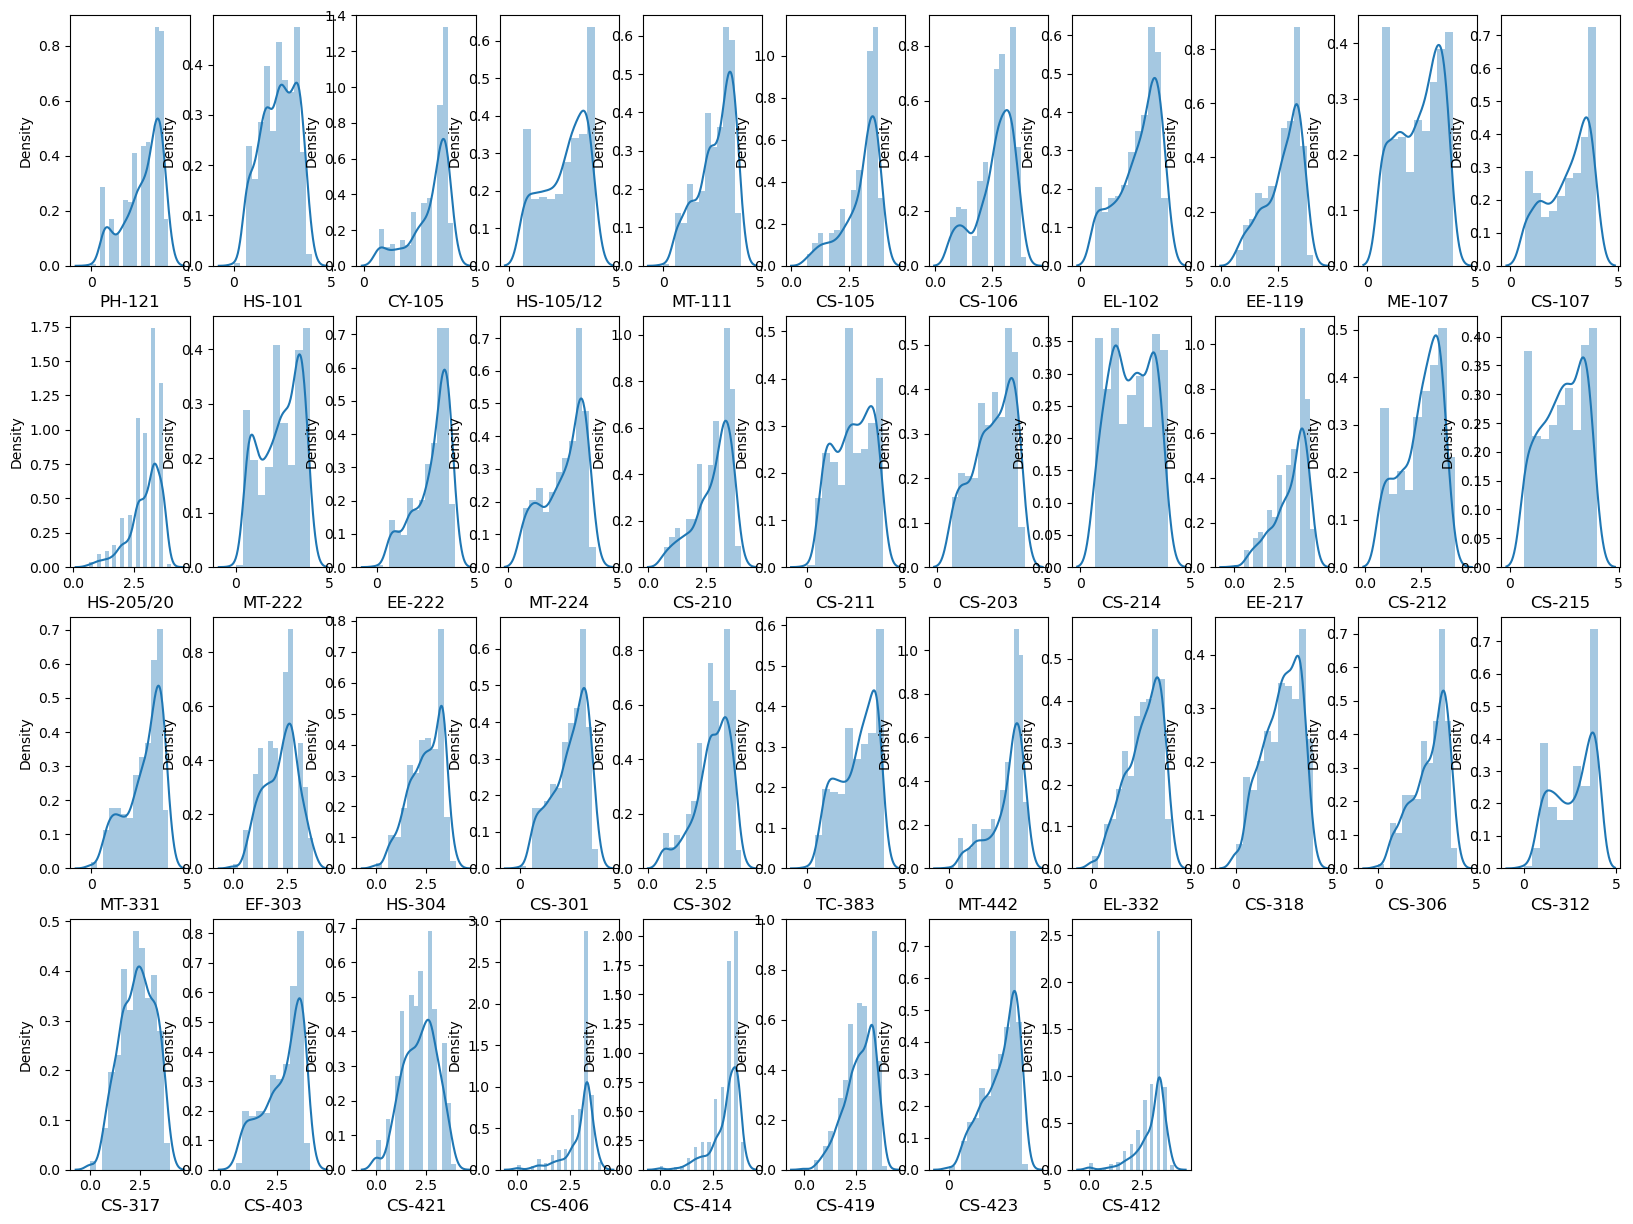

In [82]:
plt.figure(figsize=(20,15))  
plotnumber=1

for col in x.columns:
    if plotnumber<=44:
        ax=plt.subplot(4,11,plotnumber)   
        sns.distplot(df[col])  
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.show() 

Since all features are categorical, there's no concern about data distribution or skewness. We can proceed without further adjustments.

# Boxplot

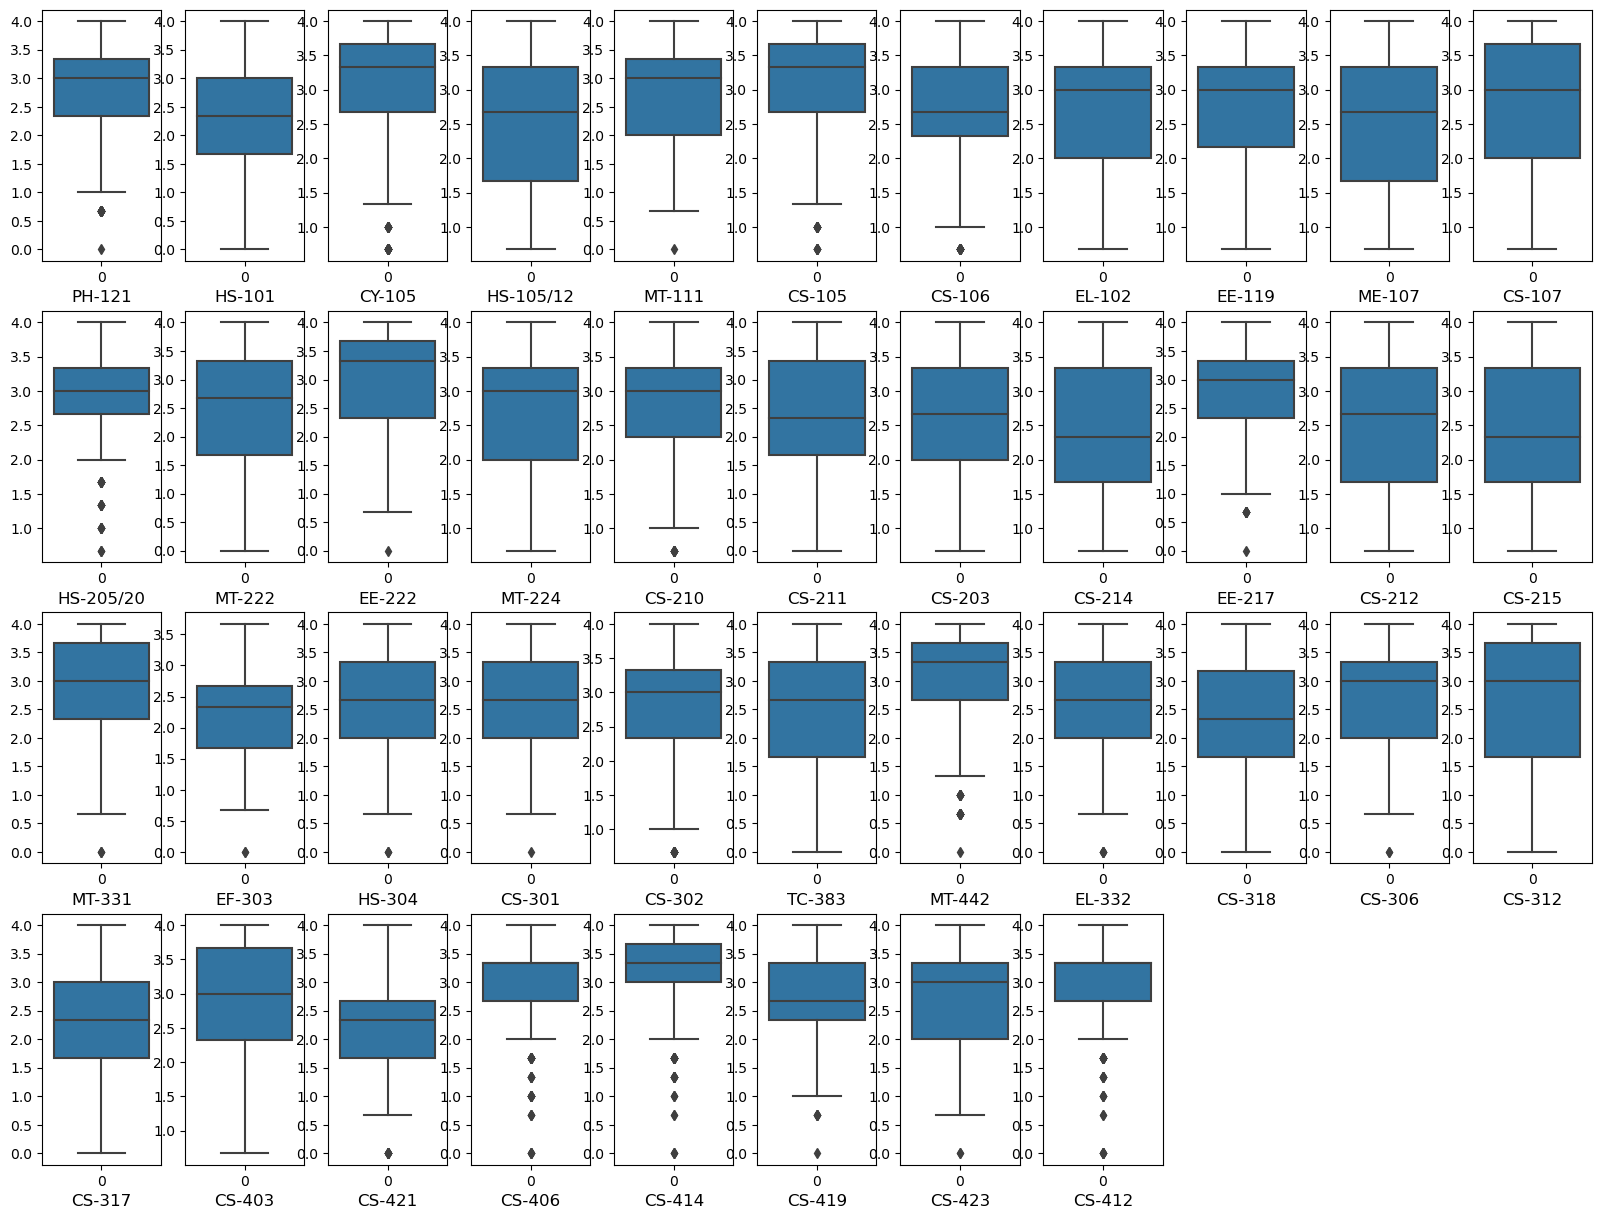

In [83]:
plt.figure(figsize=(20,15))  
plotnumber=1

for col in x.columns:
    if plotnumber<=44:
        ax=plt.subplot(4,11,plotnumber)   
        sns.boxplot(df[col])  
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.show() 


Since all features are categorical, outliers are not a concern. We can proceed without addressing outliers.

# Preparing Data for Machine Learning

# Splitting

Choose the dependent(label)and independent variables.

In [84]:
X = df.drop('CGPA', axis=1)
Y = df['CGPA']

In [85]:
X

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,2.33,1.00,1.33,1.67,1.33,1.00,0.67,1.33,2.33,1.33,...,1.67,1.33,1.33,1.33,1.33,3.33,3.67,1.33,2.67,3.33
1,3.67,0.67,1.00,0.67,2.33,1.67,0.67,3.67,1.00,0.67,...,0.67,1.00,0.67,1.67,0.67,3.33,2.33,1.67,1.67,2.67
2,3.67,2.67,3.67,2.33,3.00,3.67,2.33,3.00,3.33,3.33,...,3.33,2.67,2.67,3.67,1.67,3.67,3.67,3.67,3.33,3.67
3,0.67,2.00,1.00,0.67,0.67,3.33,1.00,1.33,0.67,2.00,...,1.33,1.00,1.67,1.00,1.33,2.33,2.67,2.00,2.00,2.00
4,3.33,3.33,3.33,3.00,3.67,3.67,3.33,3.00,3.67,3.33,...,3.33,2.33,3.00,3.00,2.33,3.33,3.67,3.33,3.33,3.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,2.67,3.67,3.67,3.33,4.00,3.67,3.33,3.33,4.00,3.00,...,3.00,3.33,3.33,3.67,3.67,3.67,3.00,3.00,2.67,3.67
567,4.00,3.67,3.67,3.67,3.67,3.67,3.67,3.33,3.67,3.67,...,3.33,3.00,3.00,3.67,3.67,3.33,2.67,3.33,1.67,3.33
568,2.67,3.67,3.33,3.00,3.67,3.67,3.67,3.67,3.67,2.67,...,3.00,3.33,2.67,3.67,3.00,3.67,1.67,3.00,3.33,3.33
569,3.67,3.00,0.67,3.67,0.67,1.00,2.33,1.33,2.33,1.33,...,3.00,0.67,2.67,2.67,1.33,0.67,1.67,2.67,2.33,1.67


In [86]:
Y

0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
566    3.798
567    3.772
568    3.470
569    2.193
570    1.753
Name: CGPA, Length: 547, dtype: float64

# Feature Scaling

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X 

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,-0.413877,-1.446794,-1.835753,-0.892340,-1.498015,-2.544788,-2.364854,-1.412099,-0.461358,-1.062888,...,-1.076808,-1.241821,-1.245226,-1.667461,-1.025275,0.446833,0.772301,-1.894741,0.022344,0.515131
1,0.992733,-1.814274,-2.203752,-1.874217,-0.406147,-1.707424,-2.364854,1.038360,-2.113792,-1.721472,...,-2.199317,-1.545991,-2.020916,-1.279143,-1.803627,0.446833,-1.221364,-1.423457,-1.139454,-0.471304
2,0.992733,0.412878,0.773692,-0.244302,0.325405,0.792170,-0.370117,0.336733,0.781074,0.932821,...,0.786556,-0.006707,0.329661,1.005079,-0.624307,0.933978,0.772301,1.348803,0.789131,1.023294
3,-2.156394,-0.333218,-2.203752,-1.874217,-2.218648,0.367239,-1.968310,-1.412099,-2.523794,-0.394326,...,-1.458461,-1.545991,-0.845628,-2.044358,-1.025275,-0.985945,-0.715509,-0.966034,-0.756061,-1.472685
4,0.635832,1.147838,0.394542,0.413555,1.056956,0.792170,0.831532,0.336733,1.203500,0.932821,...,0.786556,-0.320094,0.717506,0.239864,0.154045,0.446833,0.772301,0.877519,0.789131,1.023294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,-0.056976,1.526454,0.773692,0.737574,1.417273,0.792170,0.831532,0.682310,1.613503,0.603529,...,0.416129,0.601634,1.105351,1.005079,1.734334,0.933978,-0.224531,0.420096,0.022344,1.023294
543,1.339137,1.526454,0.773692,1.071412,1.056956,0.792170,1.240093,0.682310,1.203500,1.272091,...,0.786556,0.297464,0.717506,1.005079,1.734334,0.446833,-0.715509,0.877519,-1.139454,0.515131
544,-0.056976,1.526454,0.394542,0.413555,1.056956,0.792170,1.240093,1.038360,1.203500,0.274237,...,0.416129,0.601634,0.329661,1.005079,0.944189,0.933978,-2.203318,0.420096,0.789131,0.515131
545,0.992733,0.780358,-2.571750,1.071412,-2.218648,-2.544788,-0.370117,-1.412099,-0.461358,-1.062888,...,0.416129,-1.850161,0.329661,-0.137032,-1.025275,-3.364358,-2.203318,-0.037327,-0.372667,-1.965902


To address potential bias stemming from variations in decimal places across feature columns, I've opted to standardize all the features using the Standard Scaler method. This technique ensures that all feature columns have comparable scales, which can enhance the performance and stability of my model.

In [88]:
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=i) 
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)   
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is', maxacc,'at random state',maxrs) 

Best accuracy is 0.9868798778637047 at random state 64


In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=maxrs)

20% of the dataset will be used for testing, and the remaining 80% for training our machine learning models.

# Model Building

In [103]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
print()
def evaluate_regression(model, X, Y):
    print('Model Name:',model)
    # Splitting data into train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=maxrs)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting y_test
    pred = model.predict(X_test)
    
    # Predicting y_train
    train = model.predict(X_train)
    
    
    # R-squared Score
    r2 = r2_score(Y_test, pred)
    print("R-squared Score:", r2)
    
    #R-squared Score on training data
    r3 = r2_score(Y_train, train)
    print("R-squared Score on training data:", r3*100)
    
    # Mean Absolute Error
    mae = mean_absolute_error(Y_test, pred)
    print("Mean Absolute Error:", mae)
    
    # Mean Squared Error
    mse = mean_squared_error(Y_test, pred)
    print("Mean Squared Error:", mse)
    
    # Root Mean Squared Error
    rmse =np.sqrt(mean_squared_error(Y_test, pred))
    print("Root Mean Squared Error:", rmse)
    
    
    
    # Cross Validation Score
    cv_score = cross_val_score(model, X, Y, cv=5, scoring='r2') 
    print("\nCross Validation Score:", cv_score)
    print("Cross Validation Score Mean:", cv_score.mean())
    
    # Result of accuracy minus cv scores
    result = r2 - cv_score.mean()
    print("R-squared Score - Cross Validation Score is", result*100)


In [104]:
# Linear Regression
LR = LinearRegression()
evaluate_regression(LR,X, Y)

Model Name: LinearRegression()
R-squared Score: 0.9903268928029446
R-squared Score on training data: 96.31163512084359
Mean Absolute Error: 0.0437283122865085
Mean Squared Error: 0.003222419839985679
Root Mean Squared Error: 0.056766361870263266

Cross Validation Score: [0.97122855 0.98656225 0.97023071 0.98456085 0.83347676]
Cross Validation Score Mean: 0.9492118255790402
R-squared Score - Cross Validation Score is 4.111506722390446


In [105]:
# Ridge Regressor
RDG = Ridge()
evaluate_regression(RDG,X, Y)

Model Name: Ridge()
R-squared Score: 0.9904535936979738
R-squared Score on training data: 96.31156947201829
Mean Absolute Error: 0.04344451379276808
Mean Squared Error: 0.0031802117397787054
Root Mean Squared Error: 0.05639336609725212

Cross Validation Score: [0.9714997  0.98668745 0.97046137 0.98471133 0.83355954]
Cross Validation Score Mean: 0.9493838775617325
R-squared Score - Cross Validation Score is 4.1069716136241325


In [106]:
# Lasso Regressor
LS = Lasso()
evaluate_regression(LS,X, Y)

Model Name: Lasso()
R-squared Score: -0.014760649551461835
R-squared Score on training data: 0.0
Mean Absolute Error: 0.500637591013106
Mean Squared Error: 0.33804906565563486
Root Mean Squared Error: 0.581419870365328

Cross Validation Score: [-0.00804619 -0.01765288 -0.00096645 -0.0095442  -0.025866  ]
Cross Validation Score Mean: -0.012415142602343198
R-squared Score - Cross Validation Score is -0.23455069491186367


In [107]:
# Decision Tree Regression
DT = DecisionTreeRegressor()
evaluate_regression(DT,X, Y)

Model Name: DecisionTreeRegressor()
R-squared Score: 0.8423977157043655
R-squared Score on training data: 100.0
Mean Absolute Error: 0.16540909090909095
Mean Squared Error: 0.05250233636363638
Root Mean Squared Error: 0.22913388305450677

Cross Validation Score: [0.7771213  0.82843084 0.77924414 0.79944373 0.70407894]
Cross Validation Score Mean: 0.7776637875961334
R-squared Score - Cross Validation Score is 6.473392810823208


In [108]:
# Random Forest Regression
RFR = RandomForestRegressor()
evaluate_regression(RFR,X, Y)

Model Name: RandomForestRegressor()
R-squared Score: 0.964560344467563
R-squared Score on training data: 98.60499699264795
Mean Absolute Error: 0.07859481818181835
Mean Squared Error: 0.011806077073636378
Root Mean Squared Error: 0.1086557733101945

Cross Validation Score: [0.93916    0.94567389 0.95597362 0.95527997 0.78904493]
Cross Validation Score Mean: 0.9170264805306354
R-squared Score - Cross Validation Score is 4.75338639369276


In [109]:
# Extra Tree Regression
ETR = ExtraTreesRegressor()
evaluate_regression(ETR,X, Y)

Model Name: ExtraTreesRegressor()
R-squared Score: 0.9638873929358913
R-squared Score on training data: 100.0
Mean Absolute Error: 0.07706409090909092
Mean Squared Error: 0.012030258644545449
Root Mean Squared Error: 0.10968253573174468

Cross Validation Score: [0.94991631 0.95833762 0.96085379 0.95564093 0.79412043]
Cross Validation Score Mean: 0.9237738154628955
R-squared Score - Cross Validation Score is 4.0113577472995825


In [110]:
# ADA Boost Regressor
ABR = AdaBoostRegressor()
evaluate_regression(ABR,X, Y)

Model Name: AdaBoostRegressor()
R-squared Score: 0.922340640271415
R-squared Score on training data: 94.71563513838467
Mean Absolute Error: 0.13315158320358095
Mean Squared Error: 0.025870804122397766
Root Mean Squared Error: 0.16084403663921695

Cross Validation Score: [0.90545065 0.90435114 0.91541183 0.91376928 0.74208308]
Cross Validation Score Mean: 0.876213196654278
R-squared Score - Cross Validation Score is 4.612744361713705


In [111]:
# GradientBoostingRegressor
GBR = GradientBoostingRegressor()
evaluate_regression(GBR,X, Y)

Model Name: GradientBoostingRegressor()
R-squared Score: 0.9776850383020429
R-squared Score on training data: 99.71365963853931
Mean Absolute Error: 0.06433897314655465
Mean Squared Error: 0.007433823882971827
Root Mean Squared Error: 0.08621962585729438

Cross Validation Score: [0.95662588 0.96838709 0.96818027 0.95487577 0.79868068]
Cross Validation Score Mean: 0.9293499384376824
R-squared Score - Cross Validation Score is 4.833509986436047


In [112]:
# XGBRegressor
XGBR = XGBRegressor()
evaluate_regression(XGBR,X, Y)

Model Name: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
R-squared Score: 0.9500076873766353
R-squared Score on training data: 99.99974474313078
Mean Absolute Error: 0.10089893224889586
Mean Squared Error: 0.016654030267889072
Root Mean Squared Error: 0.12905049503155372

Cross Validation Score: [

# summary of the metrics for each model:



**Linear Regression:**
- R-squared Score: 0.9903
- R-squared Score on training data: 96.31
- Mean Absolute Error: 0.0437
- Mean Squared Error: 0.0032
- Root Mean Squared Error: 0.0568
- Cross Validation Score Mean: 0.9492
- R-squared Score - Cross Validation Score: 4.11

**Ridge Regression:**
- R-squared Score: 0.9905
- R-squared Score on training data: 96.31
- Mean Absolute Error: 0.0434
- Mean Squared Error: 0.0032
- Root Mean Squared Error: 0.0564
- Cross Validation Score Mean: 0.9494
- R-squared Score - Cross Validation Score: 4.11

**Lasso Regression:**
- R-squared Score: -0.0148
- R-squared Score on training data: 0.0
- Mean Absolute Error: 0.5006
- Mean Squared Error: 0.3380
- Root Mean Squared Error: 0.5814
- Cross Validation Score Mean: -0.0124
- R-squared Score - Cross Validation Score: -0.2346

**Decision Tree Regressor:**
- R-squared Score: 0.8424
- R-squared Score on training data: 100.0
- Mean Absolute Error: 0.1654
- Mean Squared Error: 0.0525
- Root Mean Squared Error: 0.2291
- Cross Validation Score Mean: 0.7777
- R-squared Score - Cross Validation Score: 6.47

**Random Forest Regressor:**
- R-squared Score: 0.9646
- R-squared Score on training data: 98.60
- Mean Absolute Error: 0.0786
- Mean Squared Error: 0.0118
- Root Mean Squared Error: 0.1087
- Cross Validation Score Mean: 0.9170
- R-squared Score - Cross Validation Score: 4.75

**Extra Trees Regressor:**
- R-squared Score: 0.9639
- R-squared Score on training data: 100.0
- Mean Absolute Error: 0.0771
- Mean Squared Error: 0.0120
- Root Mean Squared Error: 0.1097
- Cross Validation Score Mean: 0.9238
- R-squared Score - Cross Validation Score: 4.01

**AdaBoost Regressor:**
- R-squared Score: 0.9223
- R-squared Score on training data: 94.72
- Mean Absolute Error: 0.1332
- Mean Squared Error: 0.0259
- Root Mean Squared Error: 0.1608
- Cross Validation Score Mean: 0.8762
- R-squared Score - Cross Validation Score: 4.61

**Gradient Boosting Regressor:**
- R-squared Score: 0.9777
- R-squared Score on training data: 99.71
- Mean Absolute Error: 0.0643
- Mean Squared Error: 0.0074
- Root Mean Squared Error: 0.0862
- Cross Validation Score Mean: 0.9293
- R-squared Score - Cross Validation Score: 4.83

**XGBRegressor:**
- R-squared Score: 0.9500
- R-squared Score on training data: 99.99
- Mean Absolute Error: 0.1009
- Mean Squared Error: 0.0167
- Root Mean Squared Error: 0.1291
- Cross Validation Score Mean: 0.9069
- R-squared Score - Cross Validation Score: 4.31

it appears that the Ridge Regression model performs the best, as it has the highest R-squared score and the lowest mean absolute error, mean squared error, and root mean squared error. Additionally, its cross-validation score mean is also high, indicating robust performance across different folds of the data. Therefore, the Ridge Regression model may be considered the best model for predicting CGPA in this case.

# Hyper parameter tuning on the best ML Model

In [113]:
# Choosing the Ridge Regression as best model
param_grid = {'alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0],  # Regularization strength
              'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],  # Solver for optimization
              'fit_intercept': [True, False],  # Whether to calculate the intercept for this model
              'max_iter': [1000, 2000, 3000],  # Maximum number of iterations for optimization
              'tol': [1e-3, 1e-4, 1e-5]  # Tolerance for optimization convergence
             }


In [114]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=RDG, param_grid=param_grid, cv=5)

In [115]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0,
                                   100.0],
                         'fit_intercept': [True, False],
                         'max_iter': [1000, 2000, 3000],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga'],
                         'tol': [0.001, 0.0001, 1e-05]})

In [116]:
best_params = grid_search.best_params_
best_params

{'alpha': 100.0,
 'fit_intercept': True,
 'max_iter': 1000,
 'solver': 'sparse_cg',
 'tol': 0.001}

In [117]:
final_model_1 = Ridge(alpha=100.0,fit_intercept=True,max_iter=1000,solver='sparse_cg',tol= 0.001,random_state=maxrs)

In [118]:
final_model_1.fit(X_train, Y_train)

Ridge(alpha=100.0, max_iter=1000, random_state=64, solver='sparse_cg',
      tol=0.001)

In [119]:
pred = final_model_1.predict(X_test)

In [120]:
mse = mean_squared_error(Y_test, pred)

In [121]:
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0016964568446611807


# Saving the model

In [122]:
import joblib

filename = "FinalModel_8.pkl"
joblib.dump(final_model_1, filename)

['FinalModel_8.pkl']

In [123]:
model=joblib.load("FinalModel_8.pkl")

prediction=model.predict(X_test)
prediction

array([3.29340011, 3.18019675, 2.0085973 , 3.52057165, 2.53925009,
       2.38887142, 2.43950123, 2.64544521, 2.95509195, 2.06682901,
       1.97052673, 3.31514655, 3.03838559, 3.06348201, 2.42069845,
       2.95337846, 3.95825091, 3.27001879, 3.34556295, 2.43751756,
       2.82061949, 2.79342403, 2.80885647, 3.48110629, 3.4653992 ,
       3.01878258, 3.45317688, 3.61642395, 2.82539628, 2.38081024,
       1.70501027, 3.48424245, 3.73464944, 1.99571368, 3.46323634,
       3.64381446, 3.20391072, 3.65036164, 2.62683414, 3.53817673,
       3.31551427, 2.97346588, 2.3260393 , 2.70533314, 3.93856191,
       3.81941146, 3.73314287, 3.62392094, 2.5322977 , 2.52694473,
       1.81563125, 3.00455517, 3.77148516, 3.07057025, 3.31955062,
       3.7247073 , 3.93787377, 2.37783979, 2.2649343 , 1.90211295,
       2.25802055, 3.85354007, 2.77467488, 3.02461419, 3.38363649,
       3.12411635, 2.31322047, 3.42346672, 3.27830266, 3.46177074,
       2.2682548 , 3.33692949, 3.60246737, 3.21343877, 2.49704

In [124]:
a=np.array(Y_test)
df=pd.DataFrame()
df['Predicted']=prediction
df['Original']=a
df.head()

,Predicted,Original
0,3.293400,3.334
1,3.180197,3.205
2,2.008597,1.949
3,3.520572,3.615
4,2.539250,2.490


In [125]:
df.tail()

,Predicted,Original
105,3.419138,3.481
106,3.644051,3.645
107,3.817593,3.831
108,2.282774,2.334
109,2.282750,2.298
